In [1]:
# rename everything in fw and iv

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated
from helper_functions.invertible_neural_network import InvertibleNetworkSurrogate


In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:
datafile = directory +'/aerosol_data/phase_data_noise_small_drop.hdf5'

In [5]:
model_name = 'invertible_model1'
val_model_name = 'forward_model'

In [6]:
model_dir = directory +'/aerosol_results/simple_data/models_phase_noise_small_drop'

In [7]:
plot_dir = directory +'/aerosol_results/simple_data/invertible_model_phase_noise_small_drop0/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Load the model and the data

In [8]:
custom_objects = {
    'AdjustedRSquared': AdjustedRSquared,
}

kwargs = {
    'custom_objects': custom_objects,
    'compile': False,
}

surr = InvertibleNetworkSurrogate.load(model_dir, model_name, model_kwargs=kwargs)
#import tensorflow as tf
#tf.keras.backend.set_floatx('float32')
#surr = KerasSurrogate.load(model_dir, model_name)

val_surr = KerasSurrogate.load(model_dir, val_model_name, model_kwargs=kwargs)

In [9]:
11720/3600

3.2555555555555555

In [10]:
dvar = pd.read_hdf(datafile, key='dvar')
qoi = pd.read_hdf(datafile, key='qoi')
qoi_columns = qoi.columns

n_in = dvar.shape[1]

dvar_trainval, dvar_test, qoi_trainval, qoi_test = train_test_split(dvar,
                                                                    qoi,
                                                                    test_size=0.2)
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

dvar_trainval.reset_index(drop=True, inplace=True)
qoi_trainval.reset_index(drop=True, inplace=True)

kf = KFold(n_splits=5, random_state=76, shuffle=True)

train_ind, val_ind = next(kf.split(dvar_trainval))

dvar_train = dvar_trainval.values[train_ind]
dvar_val = dvar_trainval.values[val_ind]
qoi_train = qoi_trainval.values[train_ind]
qoi_val = qoi_trainval.values[val_ind]

In [11]:
qoi_test_plot = qoi_test.copy()

In [12]:
qoi

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0     -17.771345 -17.704797 -17.957459 -17.865704  -18.016672  -18.044317   
1     -13.178484 -13.360541 -13.744437 -14.041608  -14.110101  -14.485867   
2     -12.286111 -12.708137 -13.139051 -13.234845  -13.579566  -13.800927   
3     -11.684080 -12.310615 -12.814633 -13.148576  -13.476928  -13.708604   
4     -11.556961 -11.983597 -12.509935 -12.770248  -12.979644  -13.271720   
...          ...        ...        ...        ...         ...         ...   
39595 -13.304749 -13.531826 -13.626269 -13.862652  -14.111892  -14.260361   
39596 -11.332494 -11.651325 -11.946394 -12.106046  -12.313348  -12.415581   
39597 -12.394712 -12.599633 -12.974203 -13.282192  -13.541586  -13.849612   
39598 -11.851990 -12.285466 -12.730130 -13.180951  -13.385672  -13.588516   
39599 -11.889270 -12.234086 -12.773150 -13.145970  -13.643500  -14.200117   

       phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0      -17.994766  -18.234560  -18.225257  -18.360053  ...   -23.099696   
1      -14.604027  -14.639811  -14.785093  -15.012936  ...   -17.658470   
2      -13.899276  -14.075292  -14.181011  -14.254203  ...   -16.867407   
3      -13.966255  -14.240604  -14.479470  -14.726522  ...   -18.709767   
4      -13.401271  -13.304520  -13.394151  -13.571807  ...   -16.700332   
...           ...         ...         ...         ...  ...          ...   
39595  -14.490632  -14.815025  -14.981985  -15.292562  ...   -20.486169   
39596  -12.589864  -12.605558  -12.660775  -12.852876  ...   -15.649261   
39597  -13.879057  -14.098515  -14.206458  -14.299470  ...   -16.104368   
39598  -13.900941  -14.072391  -14.289724  -14.461440  ...   -18.473992   
39599  -14.529435  -14.827314  -15.080978  -15.265237  ...   -19.307892   

       phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0       -23.154152   -23.112985   -23.092563   -23.196693   -22.998339   
1       -17.638709   -17.629834   -17.683395   -17.607372   -17.592512   
2       -16.847661   -16.803458   -16.776042   -16.763733   -16.755185   
3       -18.703785   -18.587999   -18.675016   -18.625270   -18.657237   
4       -16.733888   -16.699115   -16.447911   -16.245983   -16.234857   
...            ...          ...          ...          ...          ...   
39595   -20.586663   -20.510820   -20.526501   -20.543328   -20.540859   
39596   -15.485770   -15.606264   -15.472857   -15.430389   -15.385731   
39597   -15.932291   -15.834025   -15.769563   -15.654480   -15.445400   
39598   -18.330845   -18.202974   -18.169556   -18.188318   -18.037586   
39599   -19.277827   -19.249236   -19.223087   -19.250990   -19.284326   

       phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0       -23.104183   -22.957337   -22.945599   -22.847879  
1       -17.680110   -17.675976   -17.662943   -17.712406  
2       -16.779984   -16.718335   -16.737263   -16.741439  
3       -18.606723   -18.511055   -18.672012   -18.654574  
4       -16.193333   -15.997936   -15.823015   -15.757476  
...            ...          ...          ...          ...  
39595   -20.509331   -20.575544   -20.565908   -20.474031  
39596   -15.304284   -15.140777   -15.118511   -15.002736  
39597   -15.509869   -15.443768   -15.551311   -15.348801  
39598   -18.047335   -18.084119   -18.106621   -18.149907  
39599   -19.302721   -19.250742   -19.342767   -19.288736  

[39600 rows x 169 columns]

# Forward Prediction

## Predict

In [13]:
dvar_test

label_GMR  label_GSD  label_RI_n  label_RI_k 
0           0.1        1.7        1.51     0.019905
1           1.9        1.6        1.45     0.007924
2           1.9        1.2        1.51     0.315479
3           0.5        1.6        1.40     0.315479
4           1.1        1.8        1.52     0.050000
...         ...        ...         ...          ...
7915        1.1        1.2        1.49     0.001256
7916        1.7        1.7        1.56     0.079245
7917        1.1        1.7        1.39     0.003155
7918        2.1        1.7        1.59     0.001256
7919        1.3        1.8        1.56     0.000792

[7920 rows x 4 columns]

In [14]:
len(dvar_test)

7920

In [15]:
import time

In [16]:
start = time.time()
qoi_pred_fw = surr.predict(dvar_test.values)
end = time.time()



In [17]:
time = (end-start)/len(dvar_test)
time

0.0001407385775537202

In [19]:
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0    -18.220995 -18.316118 -18.343722 -18.394071  -18.405508  -18.475663   
1    -11.668485 -12.123835 -12.596219 -12.853756  -13.032593  -13.189552   
2    -11.737802 -12.348462 -12.771524 -13.318353  -13.522956  -13.802922   
3    -13.798528 -13.985619 -14.214317 -14.484197  -14.767212  -14.843835   
4    -12.108689 -12.566783 -12.954161 -13.289450  -13.633107  -13.971280   
...         ...        ...        ...        ...         ...         ...   
7915 -12.139251 -12.507110 -12.891012 -13.197766  -13.395776  -13.704023   
7916 -11.798713 -12.399344 -12.830796 -13.207904  -13.444147  -13.673765   
7917 -11.983909 -12.355161 -12.860851 -13.164503  -13.290802  -13.548319   
7918 -11.553144 -12.077385 -12.307666 -12.605330  -12.656685  -12.802314   
7919 -11.880828 -12.401241 -12.754872 -13.081215  -13.227072  -13.418430   

      phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0     -18.488183  -18.521292  -18.558185  -18.577225  ...   -22.532121   
1     -13.398315  -13.559221  -13.752803  -13.726918  ...   -16.914301   
2     -14.093897  -14.202454  -14.529439  -14.505271  ...   -18.722169   
3     -15.055385  -15.078333  -15.421862  -15.568043  ...   -21.287726   
4     -14.241952  -14.456446  -14.742465  -14.772610  ...   -19.068600   
...          ...         ...         ...         ...  ...          ...   
7915  -13.939074  -14.086402  -14.461430  -14.442789  ...   -16.624153   
7916  -13.903119  -14.146116  -14.418309  -14.511766  ...   -18.663698   
7917  -13.691528  -13.788151  -14.055455  -13.998813  ...   -17.193523   
7918  -12.908614  -12.946903  -13.274049  -13.176013  ...   -14.841182   
7919  -13.548131  -13.712123  -13.940097  -13.899508  ...   -15.569161   

      phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0      -22.639444   -22.557778   -22.506570   -22.555752   -22.681481   
1      -16.651533   -16.750199   -16.852568   -16.847330   -16.750149   
2      -18.688702   -18.835014   -18.748745   -18.717888   -18.818625   
3      -21.392293   -21.275469   -21.335560   -21.248757   -21.532116   
4      -18.939662   -18.944567   -19.071620   -19.100258   -19.162605   
...           ...          ...          ...          ...          ...   
7915   -16.592983   -16.308217   -16.458438   -16.382541   -16.612453   
7916   -18.611579   -18.546288   -18.569506   -18.602277   -18.674440   
7917   -17.008225   -16.968496   -16.882386   -16.870467   -16.961597   
7918   -14.511412   -14.470214   -14.482904   -14.381239   -14.646562   
7919   -15.401542   -15.436380   -15.343553   -15.384867   -15.305692   

      phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0      -22.627284   -22.585328   -22.497359   -22.570964  
1      -16.700485   -16.658940   -16.389320   -16.542570  
2      -18.809370   -18.879317   -18.736104   -18.736352  
3      -21.517842   -21.360678   -21.481965   -21.649989  
4      -19.053769   -19.042266   -19.157417   -19.022839  
...           ...          ...          ...          ...  
7915   -16.534425   -16.506067   -16.649519   -16.416148  
7916   -18.637957   -18.685437   -18.793491   -18.592978  
7917   -16.838085   -16.866900   -16.949448   -16.757494  
7918   -14.536549   -14.296684   -14.400351   -14.128288  
7919   -15.244669   -15.332745   -15.280002   -14.993369  

[7920 rows x 169 columns]

In [20]:
qoi_pred_plot_fw = qoi_pred_fw.copy()
qoi_pred_plot_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0    -18.220995 -18.316118 -18.343722 -18.394071  -18.405508  -18.475663   
1    -11.668485 -12.123835 -12.596219 -12.853756  -13.032593  -13.189552   
2    -11.737802 -12.348462 -12.771524 -13.318353  -13.522956  -13.802922   
3    -13.798528 -13.985619 -14.214317 -14.484197  -14.767212  -14.843835   
4    -12.108689 -12.566783 -12.954161 -13.289450  -13.633107  -13.971280   
...         ...        ...        ...        ...         ...         ...   
7915 -12.139251 -12.507110 -12.891012 -13.197766  -13.395776  -13.704023   
7916 -11.798713 -12.399344 -12.830796 -13.207904  -13.444147  -13.673765   
7917 -11.983909 -12.355161 -12.860851 -13.164503  -13.290802  -13.548319   
7918 -11.553144 -12.077385 -12.307666 -12.605330  -12.656685  -12.802314   
7919 -11.880828 -12.401241 -12.754872 -13.081215  -13.227072  -13.418430   

      phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0     -18.488183  -18.521292  -18.558185  -18.577225  ...   -22.532121   
1     -13.398315  -13.559221  -13.752803  -13.726918  ...   -16.914301   
2     -14.093897  -14.202454  -14.529439  -14.505271  ...   -18.722169   
3     -15.055385  -15.078333  -15.421862  -15.568043  ...   -21.287726   
4     -14.241952  -14.456446  -14.742465  -14.772610  ...   -19.068600   
...          ...         ...         ...         ...  ...          ...   
7915  -13.939074  -14.086402  -14.461430  -14.442789  ...   -16.624153   
7916  -13.903119  -14.146116  -14.418309  -14.511766  ...   -18.663698   
7917  -13.691528  -13.788151  -14.055455  -13.998813  ...   -17.193523   
7918  -12.908614  -12.946903  -13.274049  -13.176013  ...   -14.841182   
7919  -13.548131  -13.712123  -13.940097  -13.899508  ...   -15.569161   

      phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0      -22.639444   -22.557778   -22.506570   -22.555752   -22.681481   
1      -16.651533   -16.750199   -16.852568   -16.847330   -16.750149   
2      -18.688702   -18.835014   -18.748745   -18.717888   -18.818625   
3      -21.392293   -21.275469   -21.335560   -21.248757   -21.532116   
4      -18.939662   -18.944567   -19.071620   -19.100258   -19.162605   
...           ...          ...          ...          ...          ...   
7915   -16.592983   -16.308217   -16.458438   -16.382541   -16.612453   
7916   -18.611579   -18.546288   -18.569506   -18.602277   -18.674440   
7917   -17.008225   -16.968496   -16.882386   -16.870467   -16.961597   
7918   -14.511412   -14.470214   -14.482904   -14.381239   -14.646562   
7919   -15.401542   -15.436380   -15.343553   -15.384867   -15.305692   

      phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0      -22.627284   -22.585328   -22.497359   -22.570964  
1      -16.700485   -16.658940   -16.389320   -16.542570  
2      -18.809370   -18.879317   -18.736104   -18.736352  
3      -21.517842   -21.360678   -21.481965   -21.649989  
4      -19.053769   -19.042266   -19.157417   -19.022839  
...           ...          ...          ...          ...  
7915   -16.534425   -16.506067   -16.649519   -16.416148  
7916   -18.637957   -18.685437   -18.793491   -18.592978  
7917   -16.838085   -16.866900   -16.949448   -16.757494  
7918   -14.536549   -14.296684   -14.400351   -14.128288  
7919   -15.244669   -15.332745   -15.280002   -14.993369  

[7920 rows x 169 columns]

## Calculate metrics

In [21]:
metric_fw = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj_fw = metric_fw.call(qoi_test_plot.values, qoi_pred_plot_fw.values).numpy()
r2_adj_fw = pd.Series(data=r2_adj_fw, index=qoi_test_plot.columns)
r2_adj_fw = np.round(r2_adj_fw, decimals=2)
r2_adj_fw = pd.DataFrame(r2_adj_fw).T

In [22]:
min(r2_adj_fw.min())

0.99

In [23]:
max(r2_adj_fw.min())

1.0

In [24]:
r2_adj_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0        1.0        1.0        1.0        1.0         1.0         1.0   

   phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0         1.0         1.0         1.0        0.99  ...          1.0   

   phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0         0.99          1.0          1.0          1.0         0.99   

   phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0          1.0          1.0         0.99         0.99  

[1 rows x 169 columns]

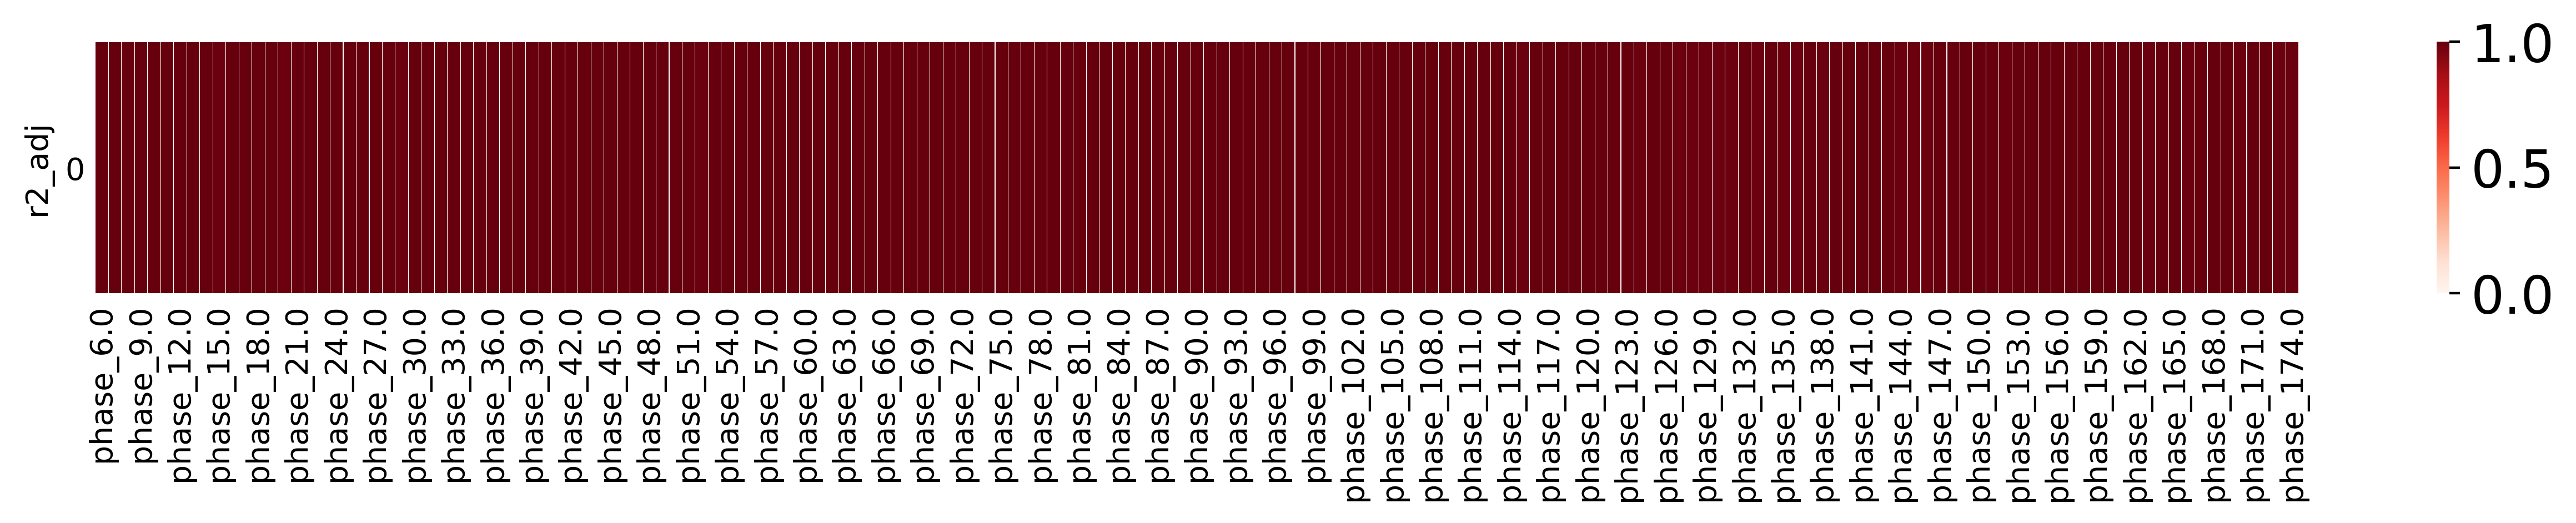

In [25]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_fw,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('r2_adj')
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_fw_r2_adj.jpg')


In [26]:
error_fw = qoi_pred_plot_fw - qoi_test_plot

In [27]:
qoi_pred_plot_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0    -18.220995 -18.316118 -18.343722 -18.394071  -18.405508  -18.475663   
1    -11.668485 -12.123835 -12.596219 -12.853756  -13.032593  -13.189552   
2    -11.737802 -12.348462 -12.771524 -13.318353  -13.522956  -13.802922   
3    -13.798528 -13.985619 -14.214317 -14.484197  -14.767212  -14.843835   
4    -12.108689 -12.566783 -12.954161 -13.289450  -13.633107  -13.971280   
...         ...        ...        ...        ...         ...         ...   
7915 -12.139251 -12.507110 -12.891012 -13.197766  -13.395776  -13.704023   
7916 -11.798713 -12.399344 -12.830796 -13.207904  -13.444147  -13.673765   
7917 -11.983909 -12.355161 -12.860851 -13.164503  -13.290802  -13.548319   
7918 -11.553144 -12.077385 -12.307666 -12.605330  -12.656685  -12.802314   
7919 -11.880828 -12.401241 -12.754872 -13.081215  -13.227072  -13.418430   

      phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0     -18.488183  -18.521292  -18.558185  -18.577225  ...   -22.532121   
1     -13.398315  -13.559221  -13.752803  -13.726918  ...   -16.914301   
2     -14.093897  -14.202454  -14.529439  -14.505271  ...   -18.722169   
3     -15.055385  -15.078333  -15.421862  -15.568043  ...   -21.287726   
4     -14.241952  -14.456446  -14.742465  -14.772610  ...   -19.068600   
...          ...         ...         ...         ...  ...          ...   
7915  -13.939074  -14.086402  -14.461430  -14.442789  ...   -16.624153   
7916  -13.903119  -14.146116  -14.418309  -14.511766  ...   -18.663698   
7917  -13.691528  -13.788151  -14.055455  -13.998813  ...   -17.193523   
7918  -12.908614  -12.946903  -13.274049  -13.176013  ...   -14.841182   
7919  -13.548131  -13.712123  -13.940097  -13.899508  ...   -15.569161   

      phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0      -22.639444   -22.557778   -22.506570   -22.555752   -22.681481   
1      -16.651533   -16.750199   -16.852568   -16.847330   -16.750149   
2      -18.688702   -18.835014   -18.748745   -18.717888   -18.818625   
3      -21.392293   -21.275469   -21.335560   -21.248757   -21.532116   
4      -18.939662   -18.944567   -19.071620   -19.100258   -19.162605   
...           ...          ...          ...          ...          ...   
7915   -16.592983   -16.308217   -16.458438   -16.382541   -16.612453   
7916   -18.611579   -18.546288   -18.569506   -18.602277   -18.674440   
7917   -17.008225   -16.968496   -16.882386   -16.870467   -16.961597   
7918   -14.511412   -14.470214   -14.482904   -14.381239   -14.646562   
7919   -15.401542   -15.436380   -15.343553   -15.384867   -15.305692   

      phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0      -22.627284   -22.585328   -22.497359   -22.570964  
1      -16.700485   -16.658940   -16.389320   -16.542570  
2      -18.809370   -18.879317   -18.736104   -18.736352  
3      -21.517842   -21.360678   -21.481965   -21.649989  
4      -19.053769   -19.042266   -19.157417   -19.022839  
...           ...          ...          ...          ...  
7915   -16.534425   -16.506067   -16.649519   -16.416148  
7916   -18.637957   -18.685437   -18.793491   -18.592978  
7917   -16.838085   -16.866900   -16.949448   -16.757494  
7918   -14.536549   -14.296684   -14.400351   -14.128288  
7919   -15.244669   -15.332745   -15.280002   -14.993369  

[7920 rows x 169 columns]

In [28]:
plot_dir

'/data/user/boiger_r/aerosol/aerosol_results/simple_data/invertible_model_phase_noise_small_drop0/plots/model'

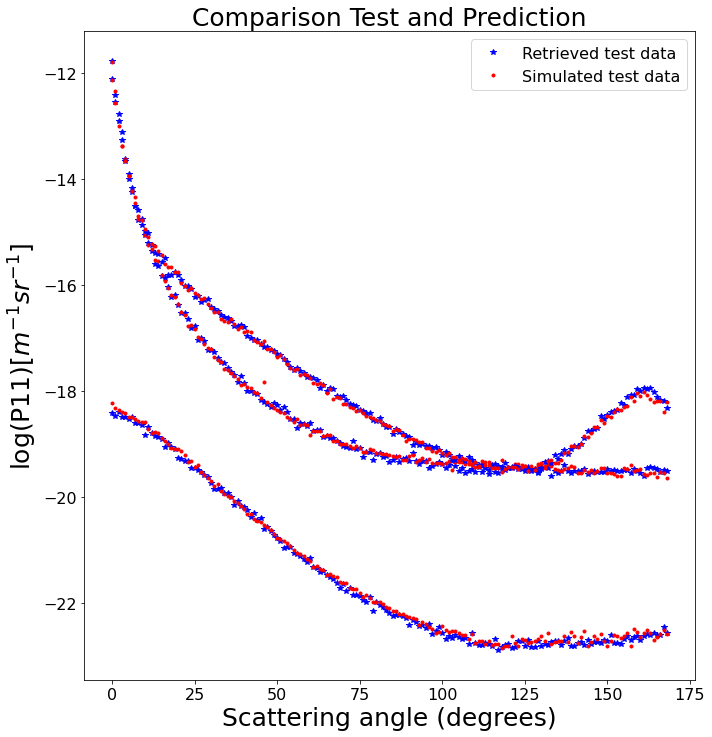

In [29]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
#presentation_plot_index = [70,18,30,46,59,65]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test_plot.columns)),qoi_test_plot.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_plot_fw.columns)),qoi_pred_plot_fw.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('log(P11)[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Retrieved test data', 'Simulated test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

In [30]:
#for col in qoi_pred_plot.columns:
#    plt.figure()
#    plt.plot(qoi_pred_plot[col], qoi_test_plot[col],'*')

In [31]:
qoi_pred_plot_fw,qoi_test_plot

(      phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
 0    -18.220995 -18.316118 -18.343722 -18.394071  -18.405508  -18.475663   
 1    -11.668485 -12.123835 -12.596219 -12.853756  -13.032593  -13.189552   
 2    -11.737802 -12.348462 -12.771524 -13.318353  -13.522956  -13.802922   
 3    -13.798528 -13.985619 -14.214317 -14.484197  -14.767212  -14.843835   
 4    -12.108689 -12.566783 -12.954161 -13.289450  -13.633107  -13.971280   
 ...         ...        ...        ...        ...         ...         ...   
 7915 -12.139251 -12.507110 -12.891012 -13.197766  -13.395776  -13.704023   
 7916 -11.798713 -12.399344 -12.830796 -13.207904  -13.444147  -13.673765   
 7917 -11.983909 -12.355161 -12.860851 -13.164503  -13.290802  -13.548319   
 7918 -11.553144 -12.077385 -12.307666 -12.605330  -12.656685  -12.802314   
 7919 -11.880828 -12.401241 -12.754872 -13.081215  -13.227072  -13.418430   
 
       phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \

In [32]:
rel_error_fw = (qoi_pred_plot_fw - qoi_test_plot) / qoi_test_plot * 100.
rel_error_fw = pd.DataFrame(rel_error_fw, columns=qoi_test_plot.columns).abs()

In [33]:
rel_error_table_fw = np.round(rel_error_fw.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [34]:
rel_error_table_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
50%       0.66       0.59       0.51       0.50        0.49        0.45   
75%       1.14       1.06       0.88       0.85        0.86        0.76   
90%       1.66       1.55       1.29       1.24        1.27        1.12   
95%       1.98       1.95       1.56       1.56        1.55        1.36   
99%       2.63       2.70       2.21       2.13        2.09        1.96   

     phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
50%        0.42        0.48        0.48        0.63  ...         0.45   
75%        0.74        0.83        0.82        1.01  ...         0.76   
90%        1.09        1.16        1.16        1.37  ...         1.10   
95%        1.32        1.40        1.39        1.60  ...         1.34   
99%        1.84        1.77        1.82        2.18  ...         1.97   

     phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
50%         0.57         0.45         0.39         0.44         0.62   
75%         0.97         0.78         0.67         0.75         1.12   
90%         1.37         1.14         1.00         1.13         1.59   
95%         1.68         1.38         1.24         1.37         1.85   
99%         2.26         1.88         1.78         1.93         2.46   

     phase_171.0  phase_172.0  phase_173.0  phase_174.0  
50%         0.54         0.51         0.63         0.58  
75%         0.97         0.89         1.16         1.07  
90%         1.47         1.31         1.68         1.73  
95%         1.78         1.59         1.99         2.11  
99%         2.40         2.36         2.46         3.29  

[5 rows x 169 columns]

In [35]:
rel_error_table_fw.max(axis = 1)

50%    0.75
75%    1.30
90%    1.88
95%    2.25
99%    3.29
dtype: float64

## Save $\bar{R}^2$

In [36]:
#r2_adj.to_latex(f'{plot_dir}/forward_pred_r2_table.tex', index=False, escape=False)

## Plot

### Relative Errors

In [37]:
np.max(rel_error_table_fw.max())

3.29

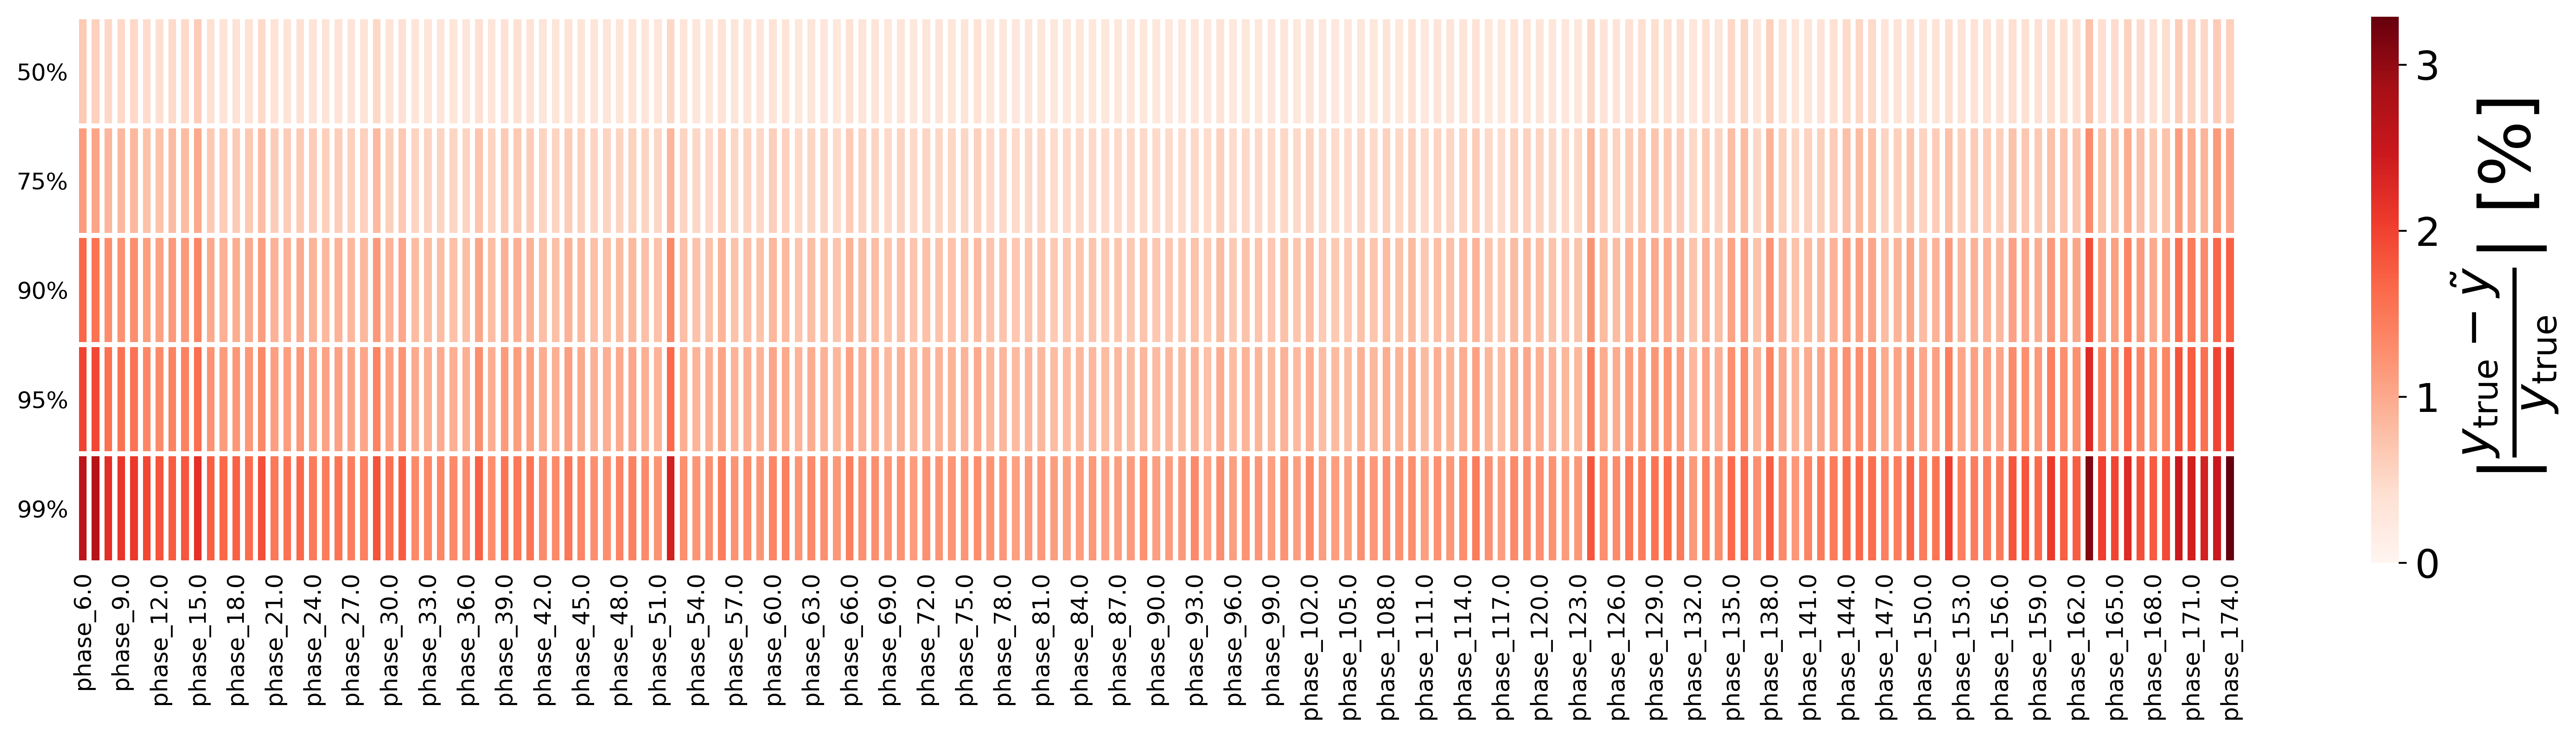

In [38]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_fw,
            cmap='Reds',
           # annot=True,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
           # annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_rel_error_percentiles.jpg')

### DVARs vs. percentage errors

In [39]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi_test_plot.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error_fw[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/forward_percentage_error_vs_{design_var}.jpg')
    
    return fig

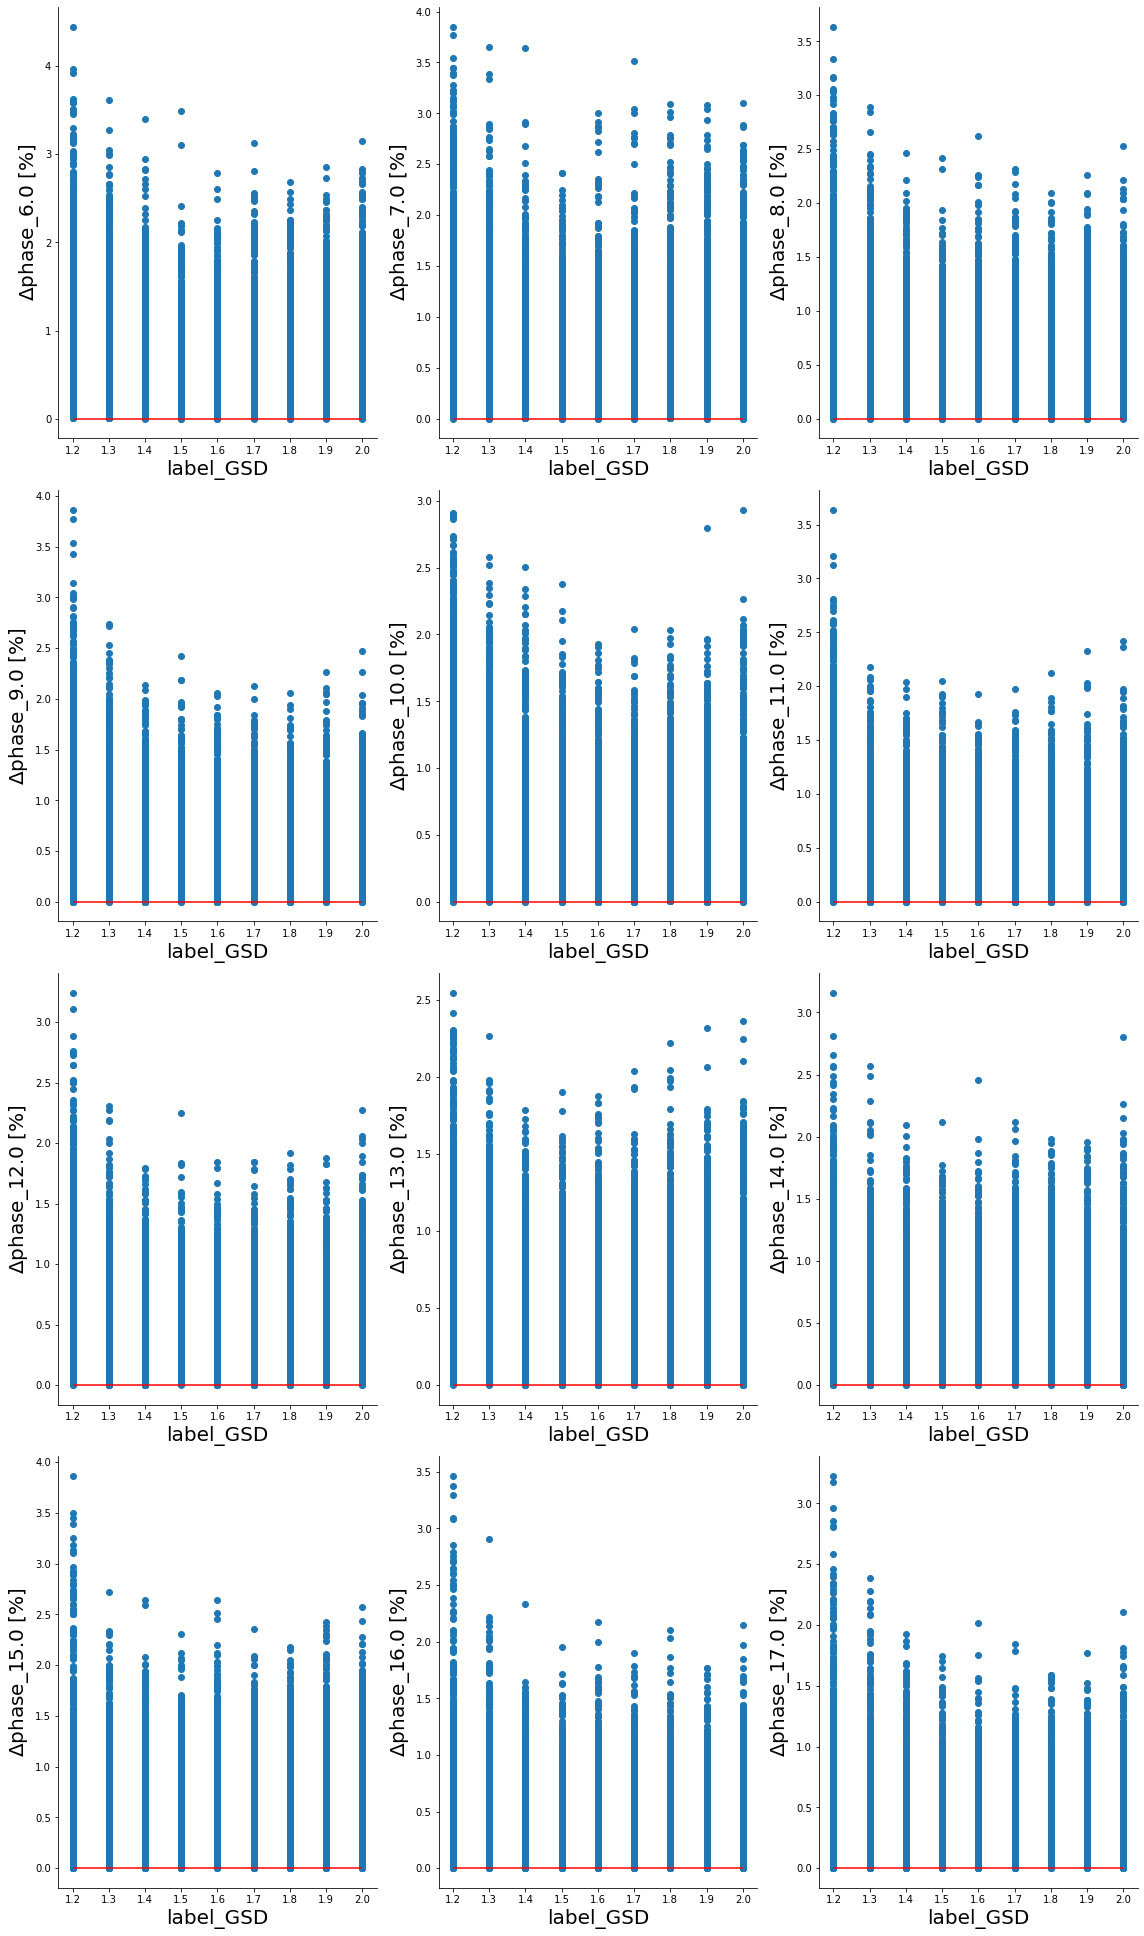

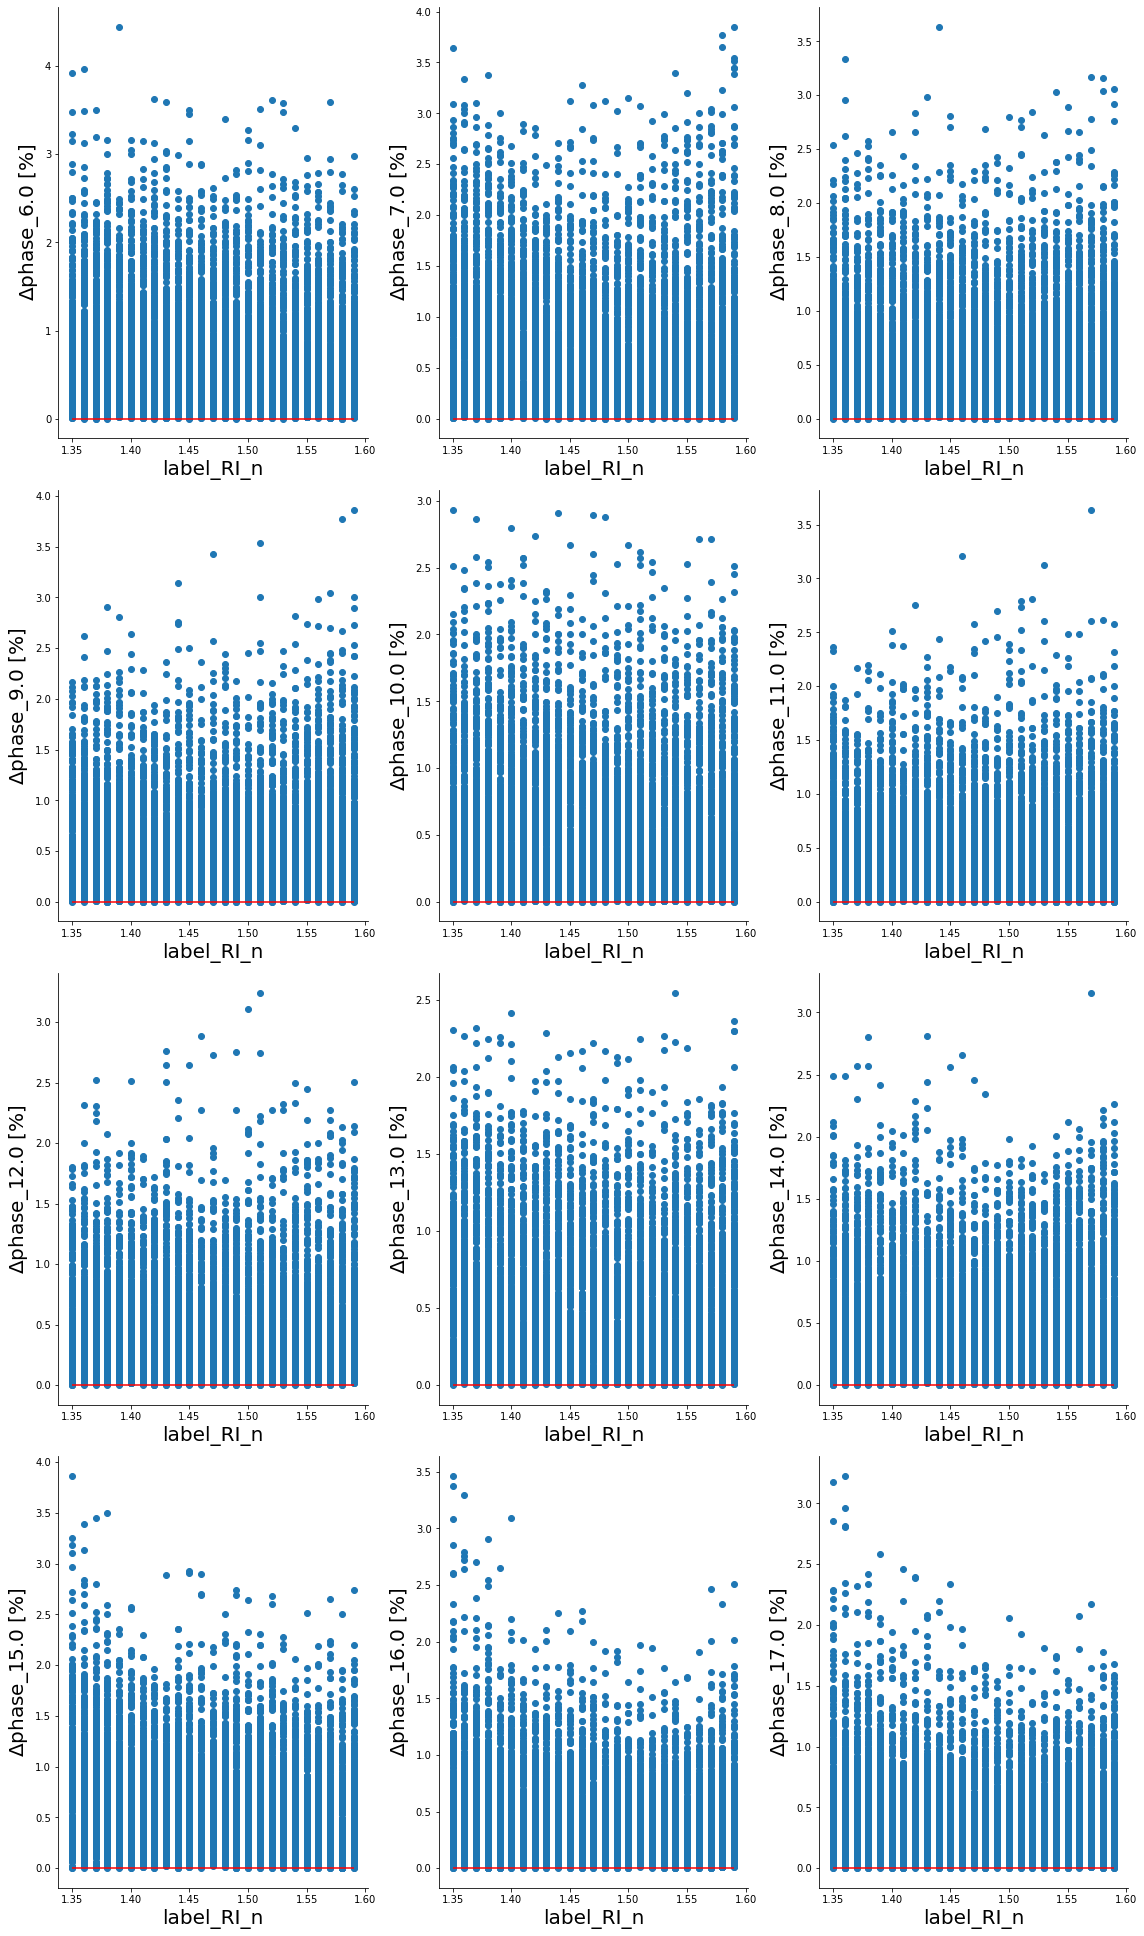

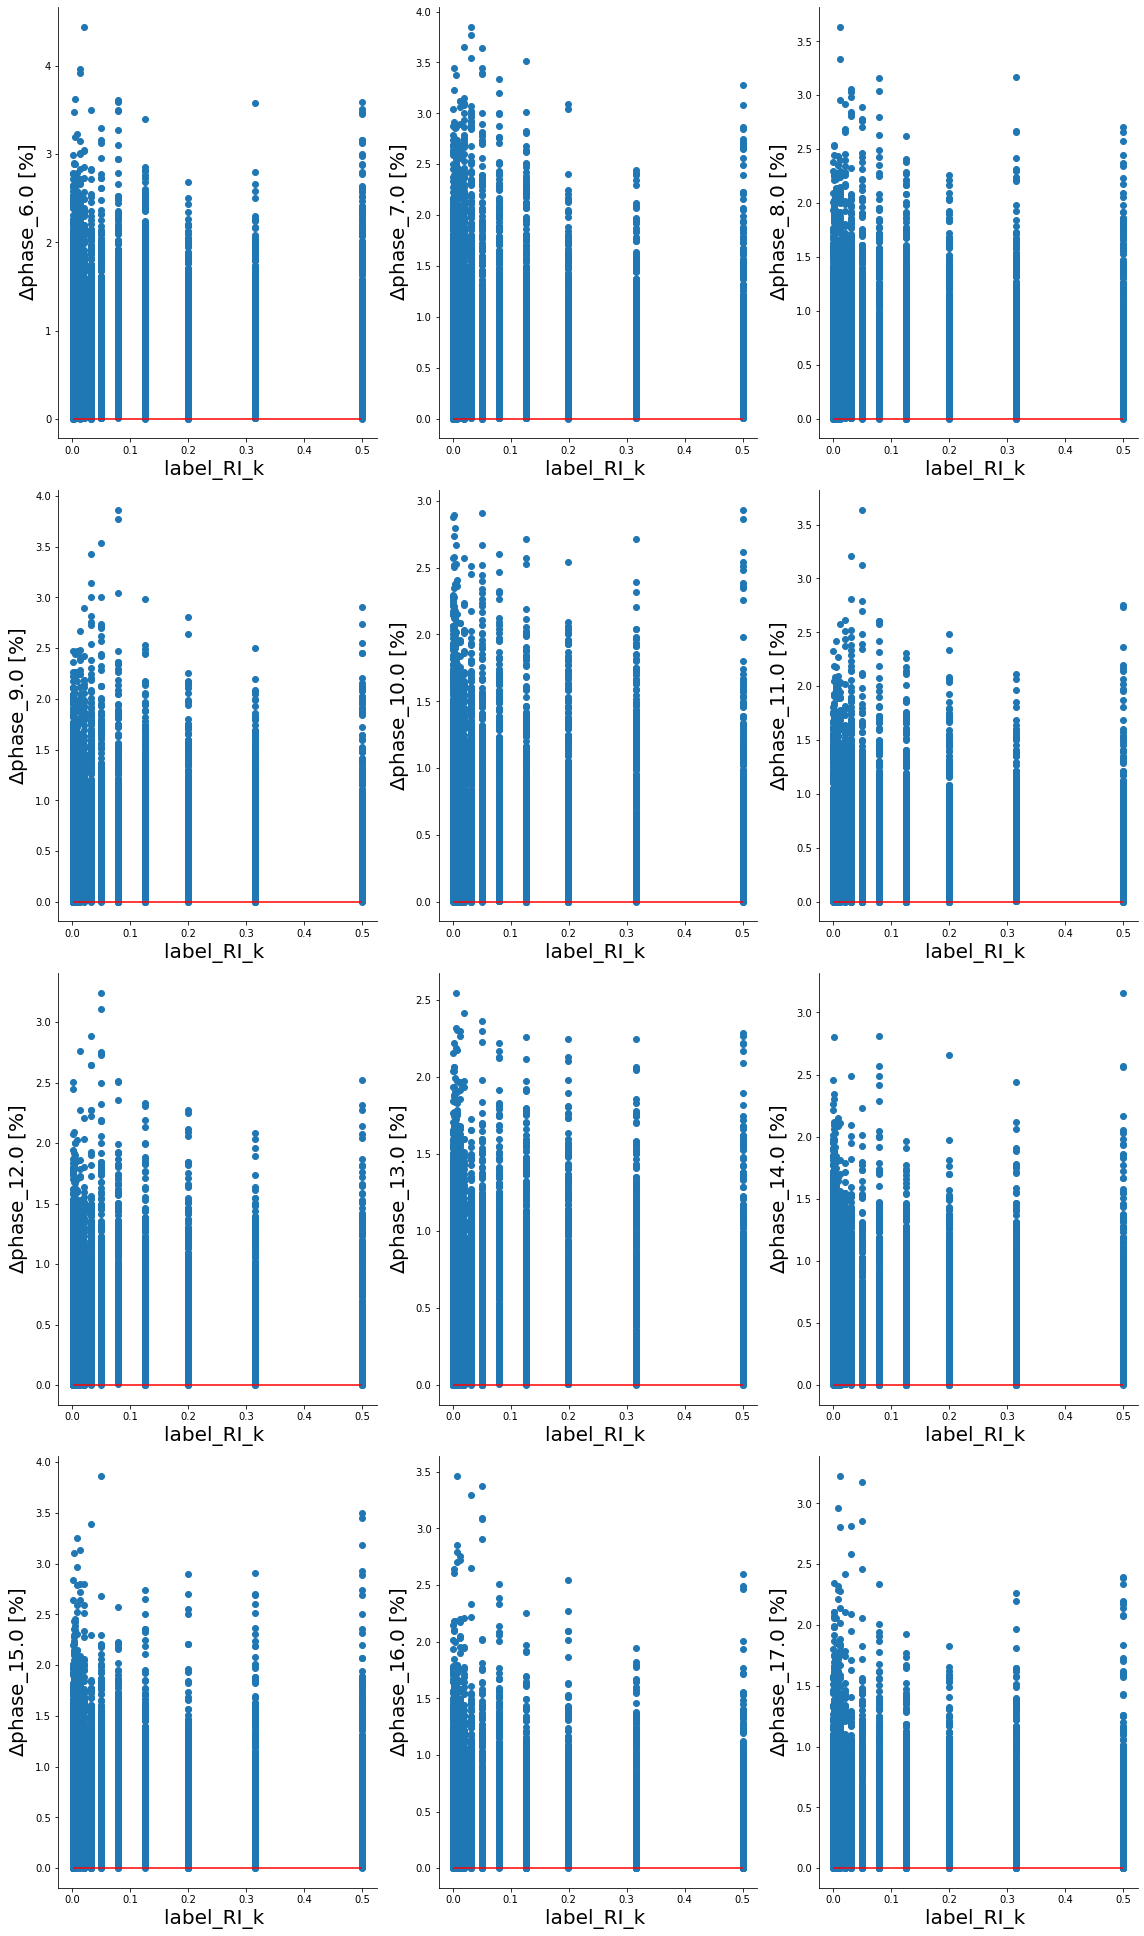

In [40]:
for d in dvar.columns:
    plot_error_vs_dvar(d)

### Correlations between DVARs and QOIs

In [41]:
combined_fw = pd.concat([dvar_test, rel_error_fw], axis=1)

In [42]:
corr_fw = np.round(combined_fw.corr(), decimals=2)

In [43]:
to_plot_fw = corr_fw.copy()
to_plot_fw.drop(columns=dvar.columns, inplace=True)
to_plot_fw.drop(index= qoi.columns,inplace=True)

In [44]:
to_plot_fw

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  \
label_GMR        -0.02      -0.01      -0.00       0.12        0.18   
label_GSD        -0.15      -0.10      -0.20      -0.19       -0.23   
label_RI_n       -0.09      -0.09       0.01       0.04       -0.07   
label_RI_k        0.10      -0.04       0.03       0.05        0.01   

             phase_11.0  phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  \
label_GMR          0.08        0.11        0.06       -0.09        0.27  ...   
label_GSD         -0.16       -0.18       -0.12       -0.07        0.02  ...   
label_RI_n         0.00       -0.03       -0.07        0.04       -0.20  ...   
label_RI_k        -0.01        0.03        0.01       -0.06        0.05  ...   

             phase_165.0  phase_166.0  phase_167.0  phase_168.0  phase_169.0  \
label_GMR           0.05        -0.03         0.01         0.06         0.13   
label_GSD          -0.03        -0.11        -0.11        -0.08        -0.03   
label_RI_n         -0.11         0.02         0.04         0.00        -0.08   
label_RI_k         -0.00        -0.09        -0.02        -0.09        -0.02   

             phase_170.0  phase_171.0  phase_172.0  phase_173.0  phase_174.0  
label_GMR          -0.07         0.04         0.11         0.03        -0.02  
label_GSD          -0.01        -0.07        -0.09        -0.01        -0.20  
label_RI_n          0.01        -0.08        -0.01         0.06        -0.15  
label_RI_k         -0.29        -0.16        -0.10        -0.26        -0.11  

[4 rows x 169 columns]

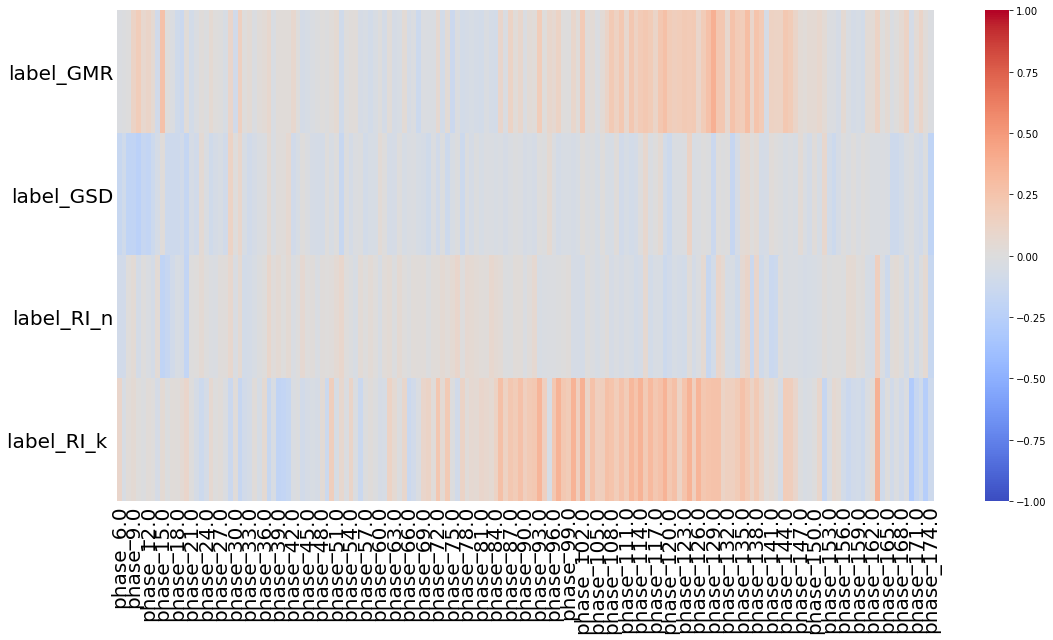

In [45]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot_fw,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
      #      annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=20)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_rel_error_correlations.jpg')

### Residuals

KeyError: 'phase_3.0'

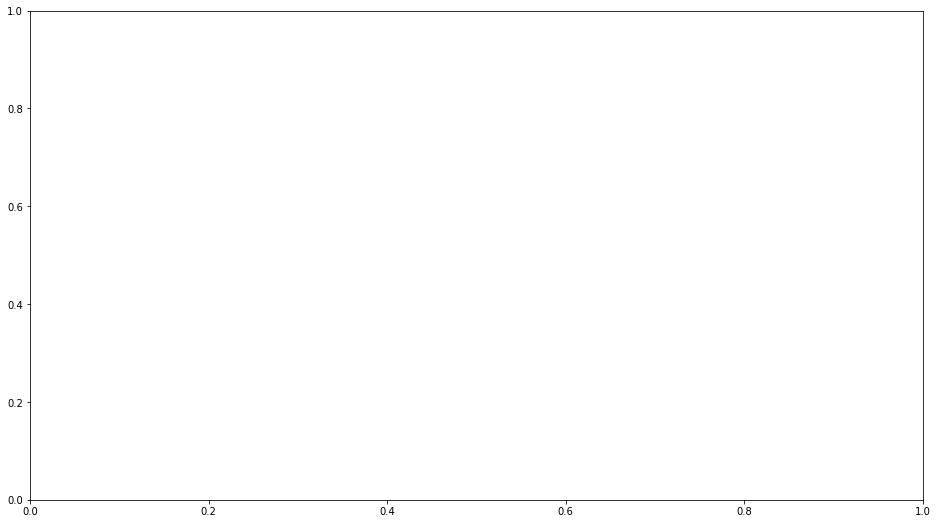

In [46]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in ['phase_3.0', 'phase_4.0', 'phase_5.0']:
    sns.distplot(error_fw[col], ax=ax)

ax.text(x=0.3,
        y=0.2,
        color=colors[0],
        s=r'$phase 0.0$',
        fontsize=30)
ax.text(x=0.3,
        y=1,
        color=colors[1],
        s=r'$phase 1.0$',
        fontsize=30)
ax.text(x=0.3,
        y=2,
        color=colors[2],
        s=r'$phase 2.0$',
        fontsize=30)

ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/forward_residual_distr_sigma.jpg')

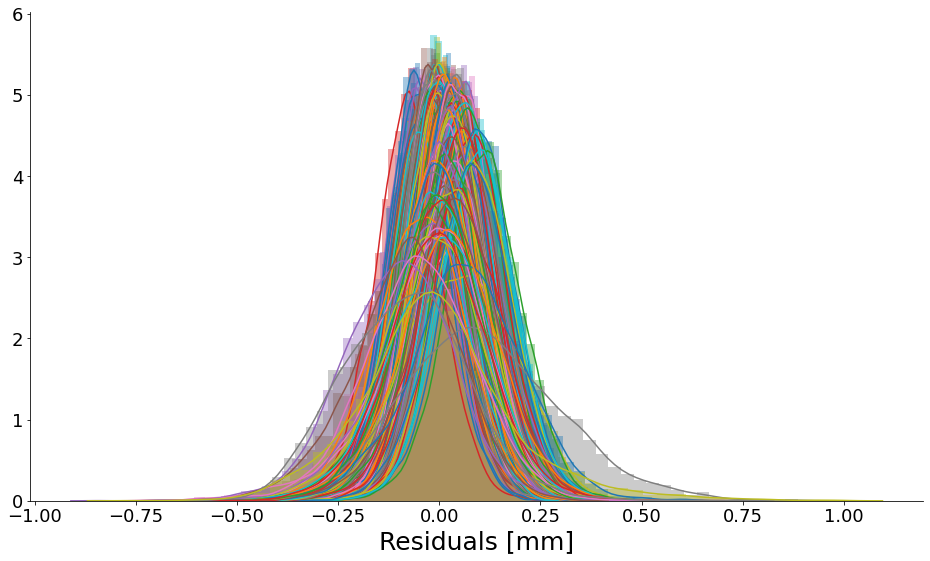

In [42]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in qoi.columns:
    sns.distplot(error_fw[col], ax=ax)
'''ax.text(x=-0.025,
        y=1.55,
        color=colors[0],
        s=r'$\sigma_x$',
        fontsize=30)
ax.text(x=0.015,
        y=1.6,
        color=colors[1],
        s=r'$\sigma_y$',
        fontsize=30)
ax.text(x=0.01,
        y=1.4,
        color=colors[2],
        s=r'$\sigma_z$',
        fontsize=30)'''
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

In [43]:
def standardise(x):
    return (x - x.mean()) / x.std()

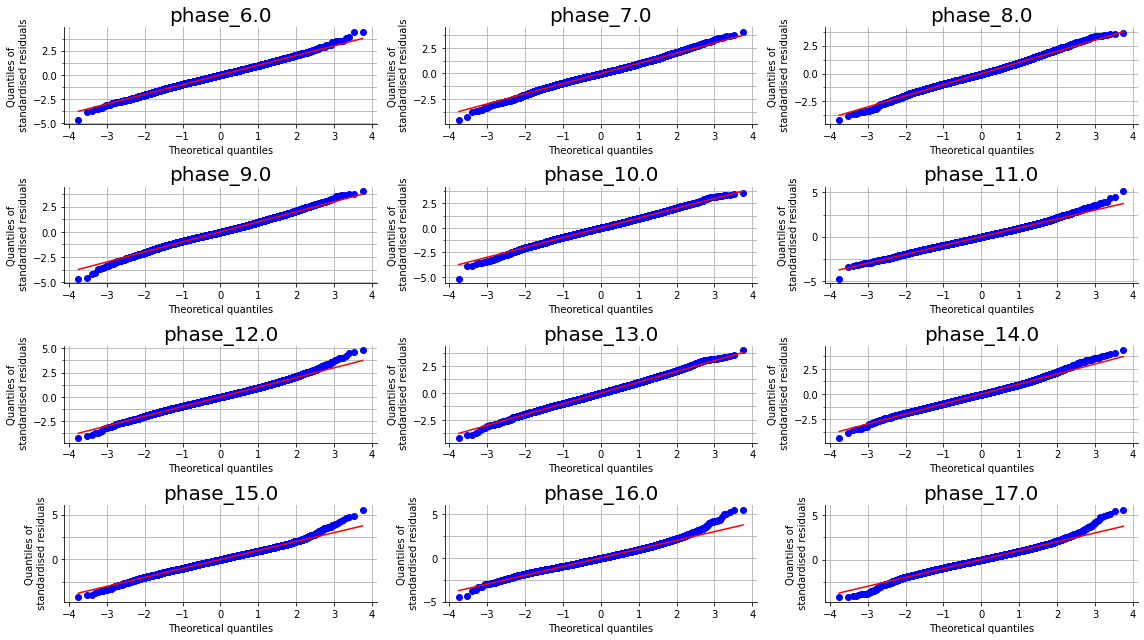

In [44]:
fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error_fw[col]), dist="norm", plot=ax);
    ax.set_title(col, fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
#fig.savefig(f'{plot_dir}/forward_residual_normality_plots.jpg')


In [45]:
pd.DataFrame({'Mean': error_fw.mean(axis=0), 'std': error_fw.std(axis=0)})

Mean       std
phase_6.0    0.031236  0.128185
phase_7.0    0.012955  0.126753
phase_8.0   -0.007272  0.108350
phase_9.0   -0.029377  0.102018
phase_10.0   0.022239  0.106167
...               ...       ...
phase_170.0 -0.103582  0.135946
phase_171.0 -0.084138  0.132622
phase_172.0 -0.047767  0.138626
phase_173.0 -0.083855  0.153515
phase_174.0 -0.006892  0.191954

[169 rows x 2 columns]

In [46]:
rel_error_fw.abs().quantile(0.9)

phase_6.0      1.656082
phase_7.0      1.547588
phase_8.0      1.294110
phase_9.0      1.241229
phase_10.0     1.265398
                 ...   
phase_170.0    1.587142
phase_171.0    1.468073
phase_172.0    1.305372
phase_173.0    1.683843
phase_174.0    1.726636
Name: 0.9, Length: 169, dtype: float64

In [47]:
statistic_fw, p_fw = scipy.stats.shapiro(standardise(error_fw['phase_5.0']).values)

KeyError: 'phase_5.0'

In [ ]:
p_fw

In [ ]:
statistic_fw

# Inverse Prediction

## Predict

In [18]:
qoi_test

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0    -18.415465 -18.465986 -18.398040 -18.487391  -18.480421  -18.519412   
1    -11.627983 -12.108985 -12.513728 -12.854287  -13.124221  -13.282346   
2    -11.578732 -12.202982 -12.847921 -13.464570  -13.770724  -13.925727   
3    -13.825482 -13.999129 -14.209976 -14.546783  -14.628525  -14.859563   
4    -12.111478 -12.651397 -13.024836 -13.406547  -13.591728  -14.034565   
...         ...        ...        ...        ...         ...         ...   
7915 -12.038063 -12.331812 -12.714566 -12.981588  -13.295558  -13.707160   
7916 -11.795872 -12.299560 -12.690137 -13.115309  -13.376151  -13.793223   
7917 -12.064154 -12.476666 -12.914007 -13.137329  -13.413199  -13.576897   
7918 -11.509748 -11.924759 -12.179759 -12.502115  -12.662054  -12.874380   
7919 -11.993724 -12.345065 -12.604730 -12.860646  -13.168394  -13.356363   

      phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
0     -18.491996  -18.589964  -18.591633  -18.635576  ...   -22.611045   
1     -13.433556  -13.526982  -13.710516  -13.835960  ...   -16.978243   
2     -14.143352  -14.263165  -14.531662  -14.646670  ...   -18.705510   
3     -15.051703  -15.189986  -15.535944  -15.744483  ...   -21.308447   
4     -14.372486  -14.603963  -14.707389  -15.030654  ...   -19.096699   
...          ...         ...         ...         ...  ...          ...   
7915  -13.928976  -14.156790  -14.369012  -14.510187  ...   -16.449071   
7916  -13.963036  -14.127214  -14.381061  -14.653214  ...   -18.594538   
7917  -13.741170  -13.861917  -14.009118  -14.101381  ...   -17.106856   
7918  -12.998858  -13.147496  -13.200980  -13.241938  ...   -14.860370   
7919  -13.535649  -13.719048  -13.773455  -13.808225  ...   -15.409086   

      phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
0      -22.694956   -22.620625   -22.572188   -22.593037   -22.549038   
1      -16.929375   -16.872963   -16.810339   -16.661514   -16.709835   
2      -18.789373   -18.833657   -18.689136   -18.742074   -18.797240   
3      -21.348404   -21.352128   -21.184235   -21.320513   -21.263376   
4      -19.114666   -19.039828   -19.089701   -19.088554   -19.086916   
...           ...          ...          ...          ...          ...   
7915   -16.350016   -16.220231   -16.258120   -16.261095   -16.335008   
7916   -18.676477   -18.612037   -18.619601   -18.640888   -18.701372   
7917   -17.029708   -16.923924   -16.794910   -16.855204   -16.823101   
7918   -14.765657   -14.679394   -14.514376   -14.415023   -14.333655   
7919   -15.293071   -15.421234   -15.253616   -15.250347   -15.148542   

      phase_171.0  phase_172.0  phase_173.0  phase_174.0  
0      -22.589570   -22.589502   -22.437700   -22.567574  
1      -16.530423   -16.440749   -16.262294   -16.213765  
2      -18.779535   -18.695260   -18.781532   -18.817650  
3      -21.315834   -21.308051   -21.299129   -21.310166  
4      -19.149727   -19.063158   -18.967654   -18.906812  
...           ...          ...          ...          ...  
7915   -16.356982   -16.469232   -16.718631   -16.784577  
7916   -18.623370   -18.635303   -18.616308   -18.646484  
7917   -16.836196   -16.704401   -16.750486   -16.635130  
7918   -14.340717   -14.347152   -14.338010   -14.306286  
7919   -15.171384   -15.134331   -15.043750   -14.988981  

[7920 rows x 169 columns]

In [19]:
import time

In [20]:
n_tries = 32
start = time.time()
dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
end = time.time()


In [21]:
iv_time = (end-start)/len(qoi_test)
iv_time

0.006303279688864043

In [45]:
all_r2_adj_iv = []

for n_tries in [1, 2, 4, 8, 16, 32]:
    dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
    qoi_pred_iv = val_surr.predict(dvar_pred_iv, batch_size=128)
    qoi_pred_iv = pd.DataFrame(data=qoi_pred_iv, columns=qoi_test.columns)
    
    metric_iv = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

    qoi_pred_plot_iv = qoi_pred_iv.copy()
    r2_adj_iv = metric_iv.call(qoi_test_plot.values, qoi_pred_plot_iv.values).numpy()
    r2_adj_iv = pd.Series(data=r2_adj_iv, index=qoi_test_plot.columns)
    r2_adj_iv = np.round(r2_adj_iv, decimals=2)
    #r2_adj = pd.DataFrame(r2_adj).T.rename(columns=qoi.columns)
    
    r2_adj_iv['n_tries'] = n_tries
    all_r2_adj_iv.append(r2_adj_iv)

all_r2_adj_iv = pd.concat(all_r2_adj_iv, ignore_index=True)

In [46]:
r2_adj_iv = pd.DataFrame(r2_adj_iv).T

In [47]:
dvar_pred_iv_df = pd.DataFrame(dvar_pred_iv,columns = dvar_test.columns)

In [48]:
datapoint = 6000
mu1 = dvar_pred_iv_df.iloc[datapoint]['label_GMR']
sigma1 = dvar_pred_iv_df.iloc[datapoint]['label_GSD']
mu2 = dvar_test.iloc[datapoint]['label_GMR']
sigma2 = dvar_test.iloc[datapoint]['label_GSD']

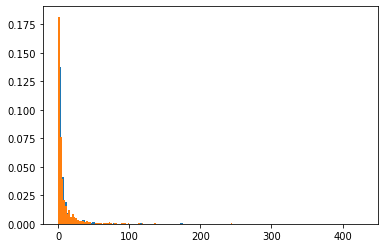

In [49]:

s1 = np.random.lognormal(mu1, sigma1, 1000)
s2 = np.random.lognormal(mu2, sigma2, 1000)


count1, bins1, ignored1 = plt.hist(s1, 100, density=True, align='mid')
count2, bins2, ignored2 = plt.hist(s2, 100, density=True, align='mid')

x1 = np.linspace(min(bins1), max(bins1), 10000)
x2 = np.linspace(min(bins2), max(bins2), 10000)

pdf1 = (np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
pdf2 = (np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))


In [50]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]

#presentation_plot_index = [1000,2000,3000,4000,5000,6000,7000]
#presentation_plot_index = [1000,2000,4000,7000]
#presentation_plot_index = [1000,100,200,300,400,500,600,700]
presentation_plot_index = [0,5,6,7,8,9,1000,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv_df.iloc[datapoint]['label_GMR']
    sigma1 = dvar_pred_iv_df.iloc[datapoint]['label_GSD']
    mu2 = dvar_test.iloc[datapoint]['label_GMR']
    sigma2 = dvar_test.iloc[datapoint]['label_GSD']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = (np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = (np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)



0
6
5000
6000


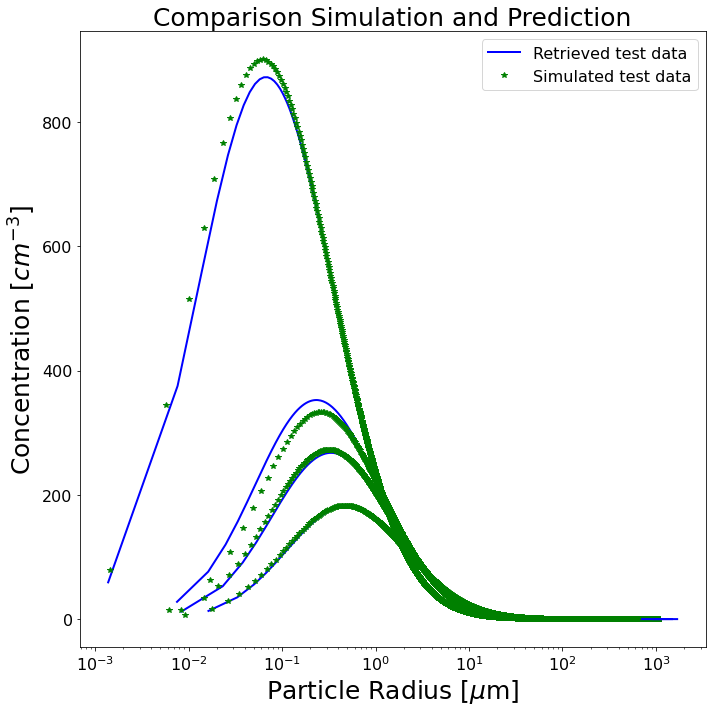

In [51]:
fig, ax = plt.subplots(figsize = (10,10))
#for datalen in range(len(x1data)):
for datalen in (0,2,7,8):
    print(presentation_plot_index[datalen])
    
#datalen = 8  
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Retrieved test data', 'Simulated test data'], fontsize = 16)
ax.legend(fontsize = 16)   
    #plt.yscale('logit')

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration [$cm^{-3}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')
#ax.get_legend().get_title().set_fontsize('16')

fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')






#plt.axis('tight')


In [52]:
presentation_plot_index = [1000,100,200,300,400,500,600,700]

In [53]:
dvar_test.loc[presentation_plot_index]

label_GMR  label_GSD  label_RI_n  label_RI_k 
1000        0.3        1.8        1.41     0.125594
100         1.3        1.4        1.53     0.199054
200         1.7        1.7        1.46     0.079245
300         0.7        1.7        1.40     0.000500
400         1.9        1.6        1.45     0.019905
500         1.3        1.4        1.35     0.000500
600         1.5        1.4        1.57     0.005000
700         1.1        2.0        1.43     0.003155

In [121]:

dvar_pred_iv_df_help

NameError: name 'dvar_pred_iv_df_help' is not defined

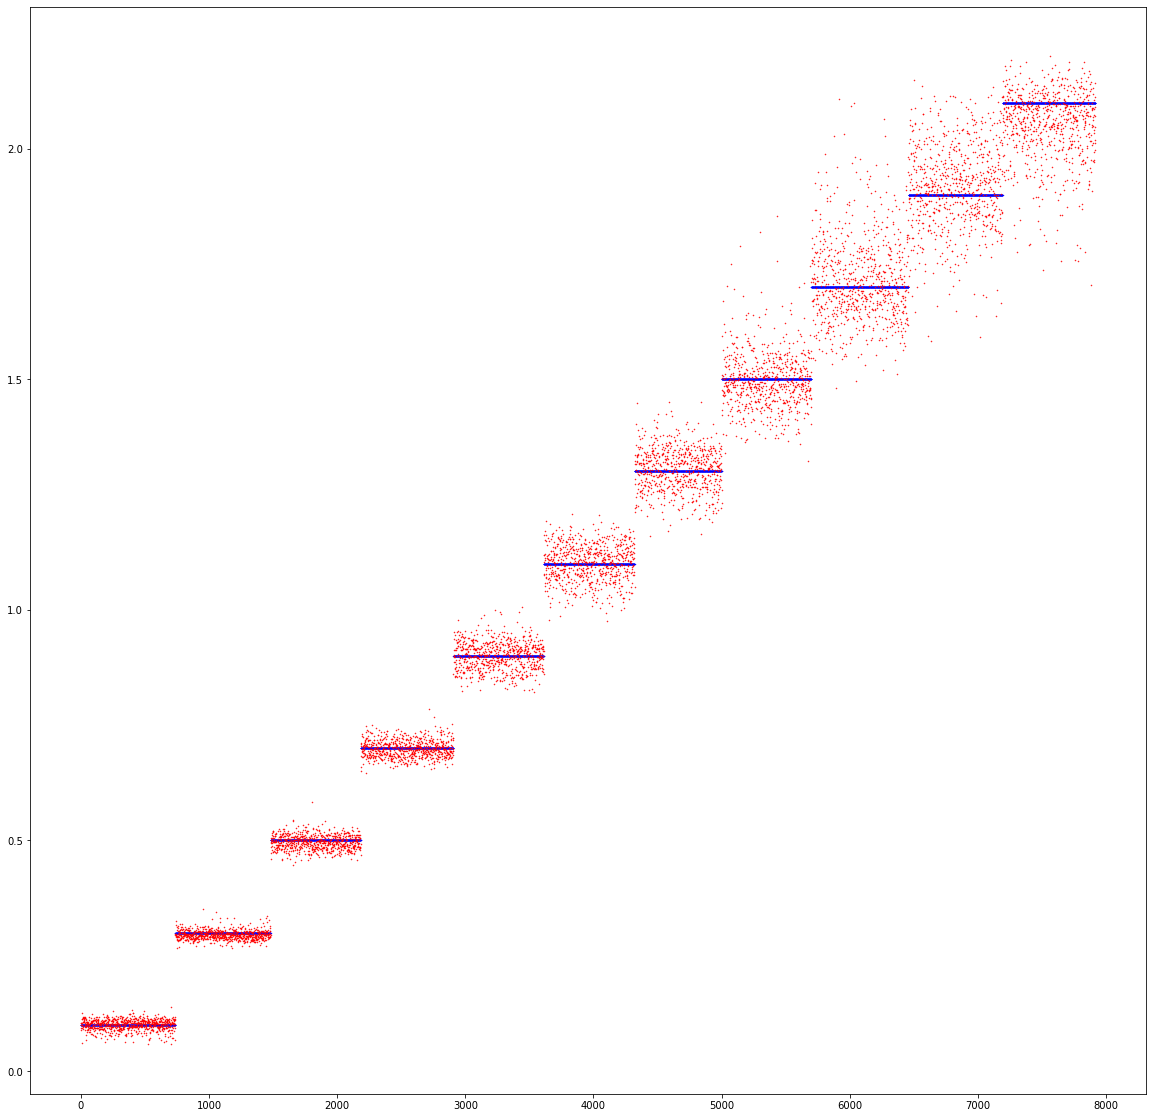

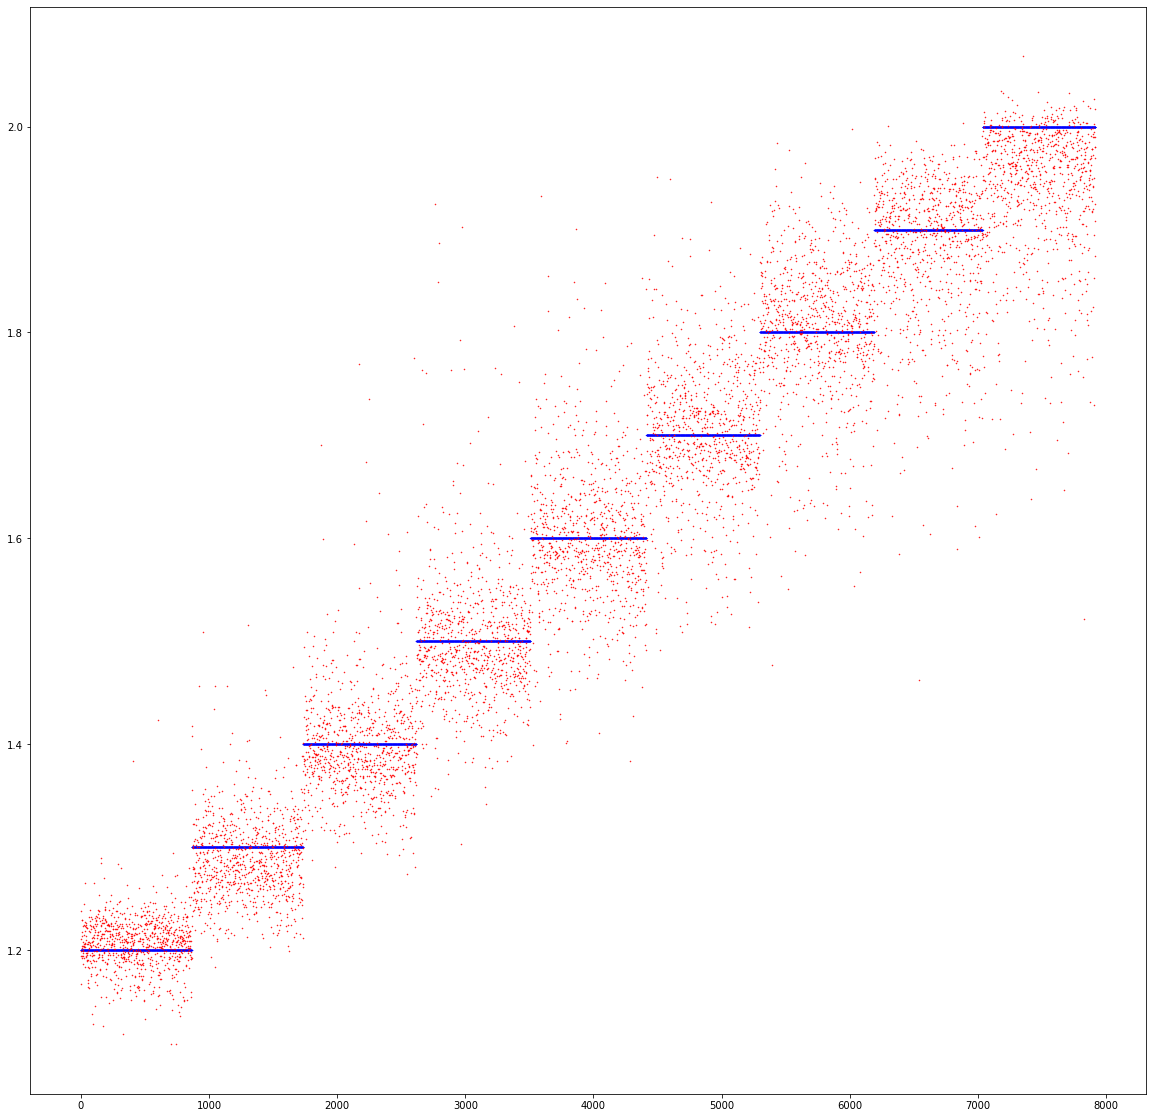

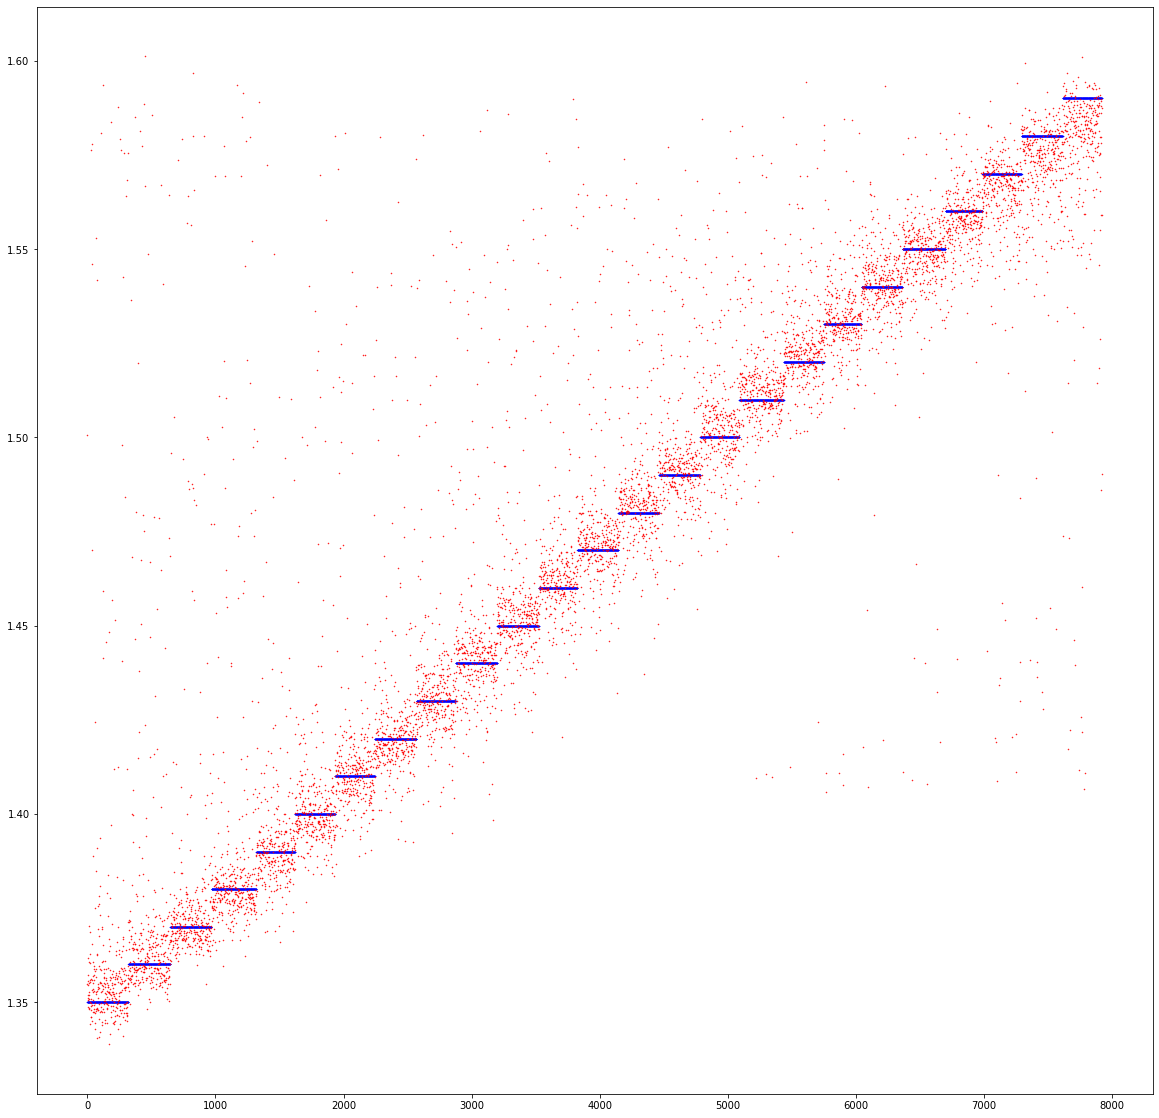

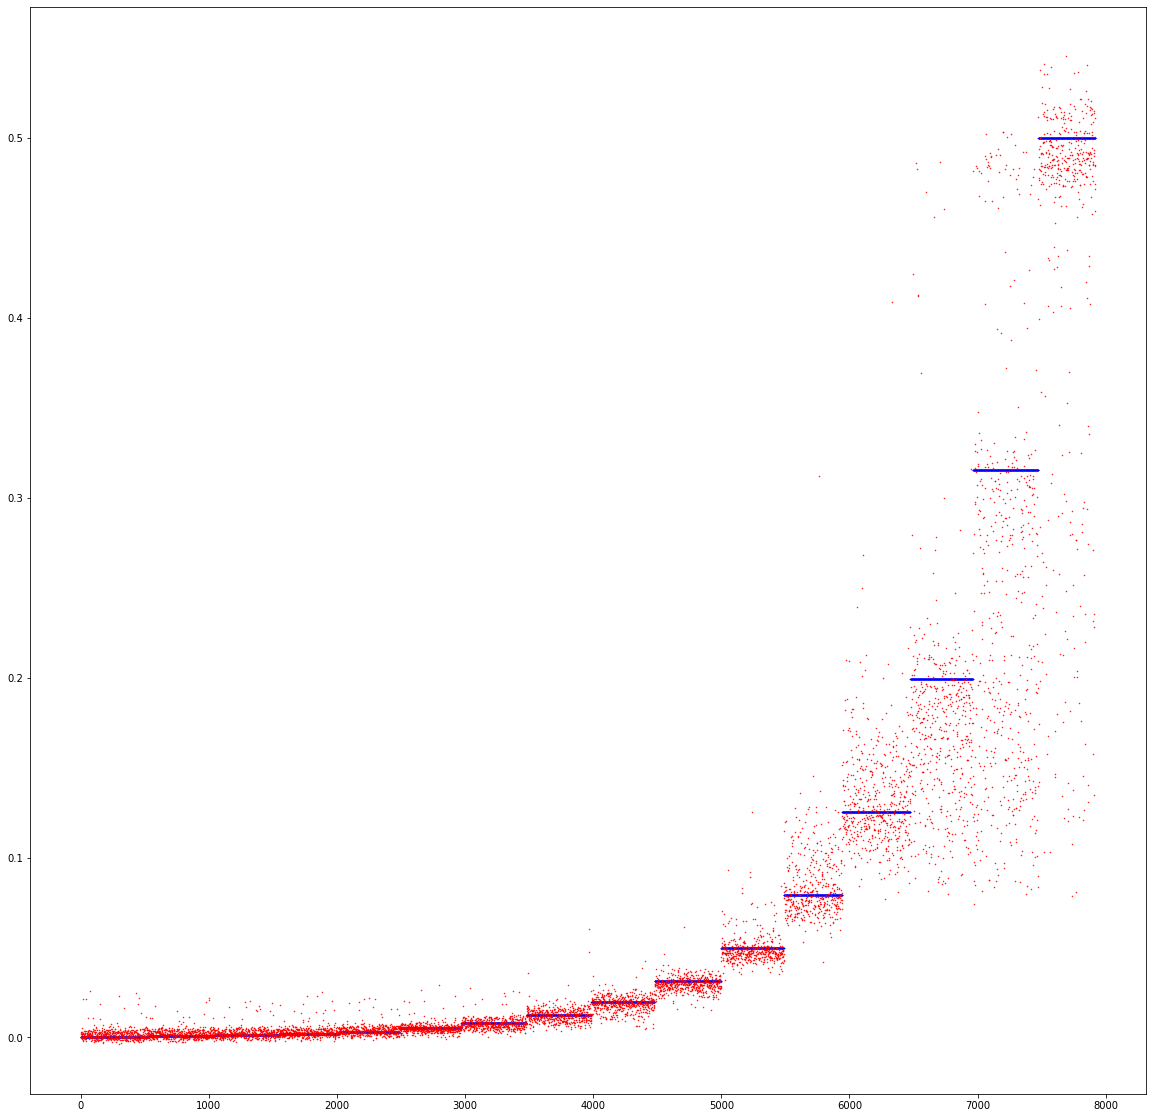

In [122]:
for key in dvar_test.columns:
    dvar_test_help = dvar_test.sort_values(key)
    dvar_pred_iv_df_help = dvar_pred_iv_df.loc[dvar_test_help.index]

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.plot(np.arange(0,len(dvar_test_help)),dvar_test_help[key],'b.', markersize = '1')
    ax.plot(np.arange(0,len(dvar_pred_iv_df_help)),dvar_pred_iv_df_help[key],'r.', markersize = '1')

In [123]:
print(dvar_test.nunique())
print(11*9*1*25*16)
for key in dvar_test.columns:
    print(key,dvar_test[key].unique())

label_GMR      11
label_GSD       9
label_RI_n     25
label_RI_k     16
dtype: int64
39600
label_GMR [0.1 1.9 0.5 1.1 0.7 0.9 2.1 0.3 1.3 1.5 1.7]
label_GSD [1.7 1.6 1.2 1.8 1.5 1.4 2.  1.9 1.3]
label_RI_n [1.51 1.45 1.4  1.52 1.54 1.38 1.47 1.55 1.39 1.37 1.5  1.56 1.49 1.41
 1.42 1.48 1.46 1.58 1.36 1.57 1.44 1.35 1.53 1.43 1.59]
label_RI_k  [0.01990536 0.00792447 0.31547867 0.05       0.01255943 0.005
 0.0005     0.03154787 0.19905359 0.12559432 0.5        0.00199054
 0.00125594 0.00315479 0.00079245 0.07924466]


In [124]:
dvar_test.sort_values('label_GMR')

label_GMR  label_GSD  label_RI_n  label_RI_k 
0           0.1        1.7        1.51     0.019905
1772        0.1        1.2        1.53     0.001991
4366        0.1        1.7        1.47     0.001991
6503        0.1        1.5        1.41     0.019905
4376        0.1        1.7        1.45     0.031548
...         ...        ...         ...          ...
3049        2.1        1.4        1.52     0.050000
606         2.1        1.4        1.53     0.003155
3853        2.1        1.6        1.59     0.001256
2409        2.1        1.4        1.57     0.125594
6232        2.1        1.8        1.36     0.005000

[7920 rows x 4 columns]

In [125]:
presentation_index = [0, 3049]

In [126]:
dvar_test.iloc[presentation_plot_index]

label_GMR  label_GSD  label_RI_n  label_RI_k 
0           0.1        1.7        1.51     0.019905
5           0.7        1.2        1.54     0.050000
6           0.9        1.5        1.40     0.012559
7           0.7        1.2        1.38     0.005000
8           0.5        1.7        1.47     0.000500
9           0.7        1.5        1.55     0.012559
1000        0.3        1.8        1.41     0.125594
5000        1.5        1.5        1.39     0.199054
6000        1.1        1.5        1.44     0.019905

In [127]:
error_dvar = dvar_test - dvar_pred_iv_df
error_dvar

label_GMR  label_GSD  label_RI_n  label_RI_k 
0     -0.003982   0.021067   -0.008888     0.002035
1     -0.127752   0.158321   -0.005955    -0.002993
2      0.026134  -0.029879   -0.075117     0.159771
3      0.020248   0.006352    0.004862     0.008526
4     -0.030066   0.057169   -0.009647     0.003216
...         ...        ...         ...          ...
7915  -0.052880   0.002115   -0.008648    -0.000495
7916   0.033075  -0.057137    0.027977    -0.041161
7917   0.047959  -0.029692    0.004800     0.002046
7918  -0.017291  -0.044139    0.001598     0.002385
7919   0.100282  -0.142141    0.001765     0.000400

[7920 rows x 4 columns]

In [ ]:
plt.plot(dvar_pred_iv_df)

In [54]:
rel_error_dvar = (dvar_pred_iv_df - dvar_test) / dvar_test * 100.
rel_error_dvar = pd.DataFrame(rel_error_dvar, columns=dvar_test.columns).abs()
rel_error_dvar

label_GMR  label_GSD  label_RI_n  label_RI_k 
0      4.211271   1.500342    0.411032     5.536718
1      6.856922   9.840707    0.408710    38.762150
2      0.151695   2.612395    4.869833    50.414938
3      3.440498   0.774970    0.130980     2.537630
4      2.266403   3.313831    0.687585     6.330158
...         ...        ...         ...          ...
7915   4.787443   0.162854    0.593488    56.567442
7916   2.037060   3.341905    1.774470    51.748446
7917   3.705879   1.476715    0.331474    65.325440
7918   1.347498   2.720237    0.112801   186.747770
7919   6.570501   7.853341    0.133292    43.949821

[7920 rows x 4 columns]

In [55]:
rel_error_table_dvar = np.round(rel_error_dvar.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_dvar

label_GMR  label_GSD  label_RI_n  label_RI_k 
50%       2.57       1.91        0.33        21.44
75%       4.68       3.59        0.71        56.81
90%       7.60       6.07        1.77       186.73
95%      10.52       7.90        3.94       352.66
99%      19.01      13.05        9.71       784.89

In [56]:
rel_error_dvar.max()

label_GMR        46.880796
label_GSD        28.002644
label_RI_n       18.084836
label_RI_k     5655.409391
dtype: float64

## Calculate metrics

In [57]:
all_r2_adj_iv

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
        ...  
1015     0.99
1016     0.99
1017     0.99
1018     0.99
1019    32.00
Length: 1020, dtype: float64

In [58]:
r2_adj_iv

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
0        1.0        1.0        1.0        1.0         1.0         1.0   

   phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_166.0  \
0         1.0         1.0         1.0         1.0  ...         0.99   

   phase_167.0  phase_168.0  phase_169.0  phase_170.0  phase_171.0  \
0         0.99         0.99         0.99         0.99         0.99   

   phase_172.0  phase_173.0  phase_174.0  n_tries  
0         0.99         0.99         0.99     32.0  

[1 rows x 170 columns]

In [59]:
error_iv = qoi_pred_plot_iv - qoi_test_plot

In [60]:
rel_error_iv = (qoi_pred_plot_iv - qoi_test_plot) / qoi_test_plot * 100.
rel_error_iv = pd.DataFrame(rel_error_iv, columns=qoi_test_plot.columns).abs()

In [61]:
rel_error_table_iv = np.round(rel_error_iv.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [62]:
rel_error_table_iv

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  phase_11.0  \
50%       0.30       0.35       0.36       0.35        0.36        0.34   
75%       0.54       0.61       0.63       0.60        0.62        0.62   
90%       0.84       0.90       0.92       0.91        0.93        0.95   
95%       1.09       1.14       1.15       1.16        1.18        1.19   
99%       1.84       1.85       1.82       1.84        1.90        1.94   

     phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  phase_165.0  \
50%        0.36        0.36        0.38        0.36  ...         0.47   
75%        0.64        0.64        0.69        0.65  ...         0.94   
90%        1.00        1.01        1.09        1.10  ...         1.77   
95%        1.26        1.33        1.40        1.44  ...         2.42   
99%        2.14        2.18        2.23        2.31  ...         4.01   

     phase_166.0  phase_167.0  phase_168.0  phase_169.0  phase_170.0  \
50%         0.46         0.47         0.47         0.48         0.47   
75%         0.95         0.97         0.95         0.97         0.97   
90%         1.77         1.75         1.76         1.79         1.81   
95%         2.39         2.37         2.36         2.41         2.42   
99%         3.99         4.03         3.88         3.85         3.89   

     phase_171.0  phase_172.0  phase_173.0  phase_174.0  
50%         0.48         0.47         0.48         0.49  
75%         0.99         0.99         1.02         1.06  
90%         1.83         1.88         1.93         1.99  
95%         2.44         2.49         2.62         2.70  
99%         3.91         3.95         4.00         4.29  

[5 rows x 169 columns]

In [63]:
rel_error_table_iv.max(axis = 1)

50%    0.49
75%    1.06
90%    1.99
95%    2.70
99%    4.29
dtype: float64

## Save $\bar{R}^2$

In [64]:
#r2_adj.to_latex(f'{plot_dir}/isodar_sampling_pred_r2_table.tex', index=False, escape=False)

## Plot

In [65]:


r2_adj_iv_T = r2_adj_iv.T
r2_adj_iv_T=r2_adj_iv_T.rename(columns={0: "r2_adj"})
r2_adj_iv_T

r2_adj
phase_6.0      1.00
phase_7.0      1.00
phase_8.0      1.00
phase_9.0      1.00
phase_10.0     1.00
...             ...
phase_171.0    0.99
phase_172.0    0.99
phase_173.0    0.99
phase_174.0    0.99
n_tries       32.00

[170 rows x 1 columns]

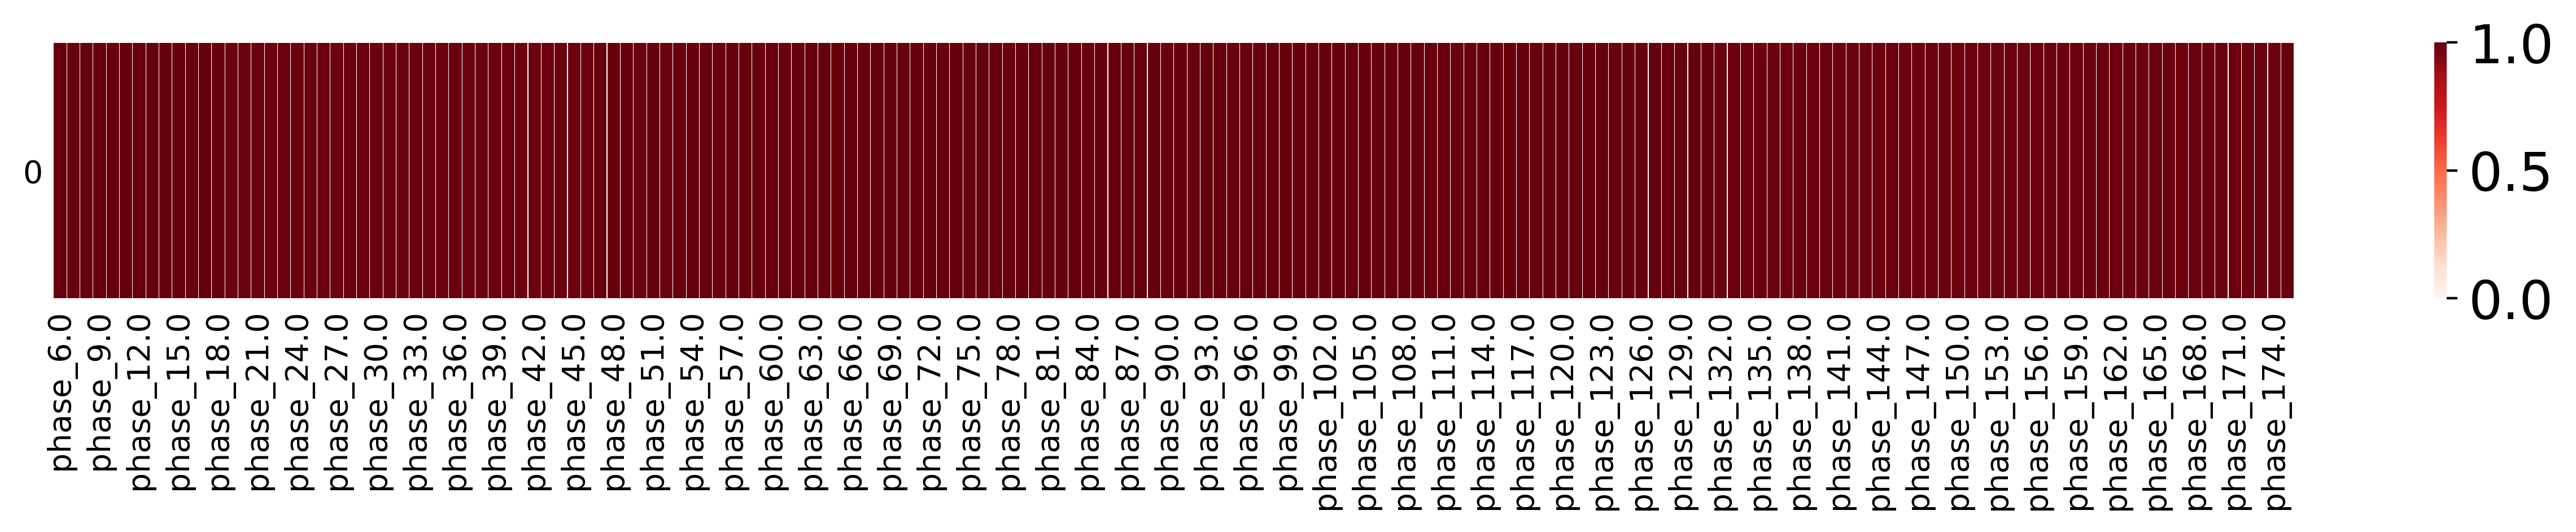

In [66]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_inv_r2_adj.jpg')


### Relative Errors

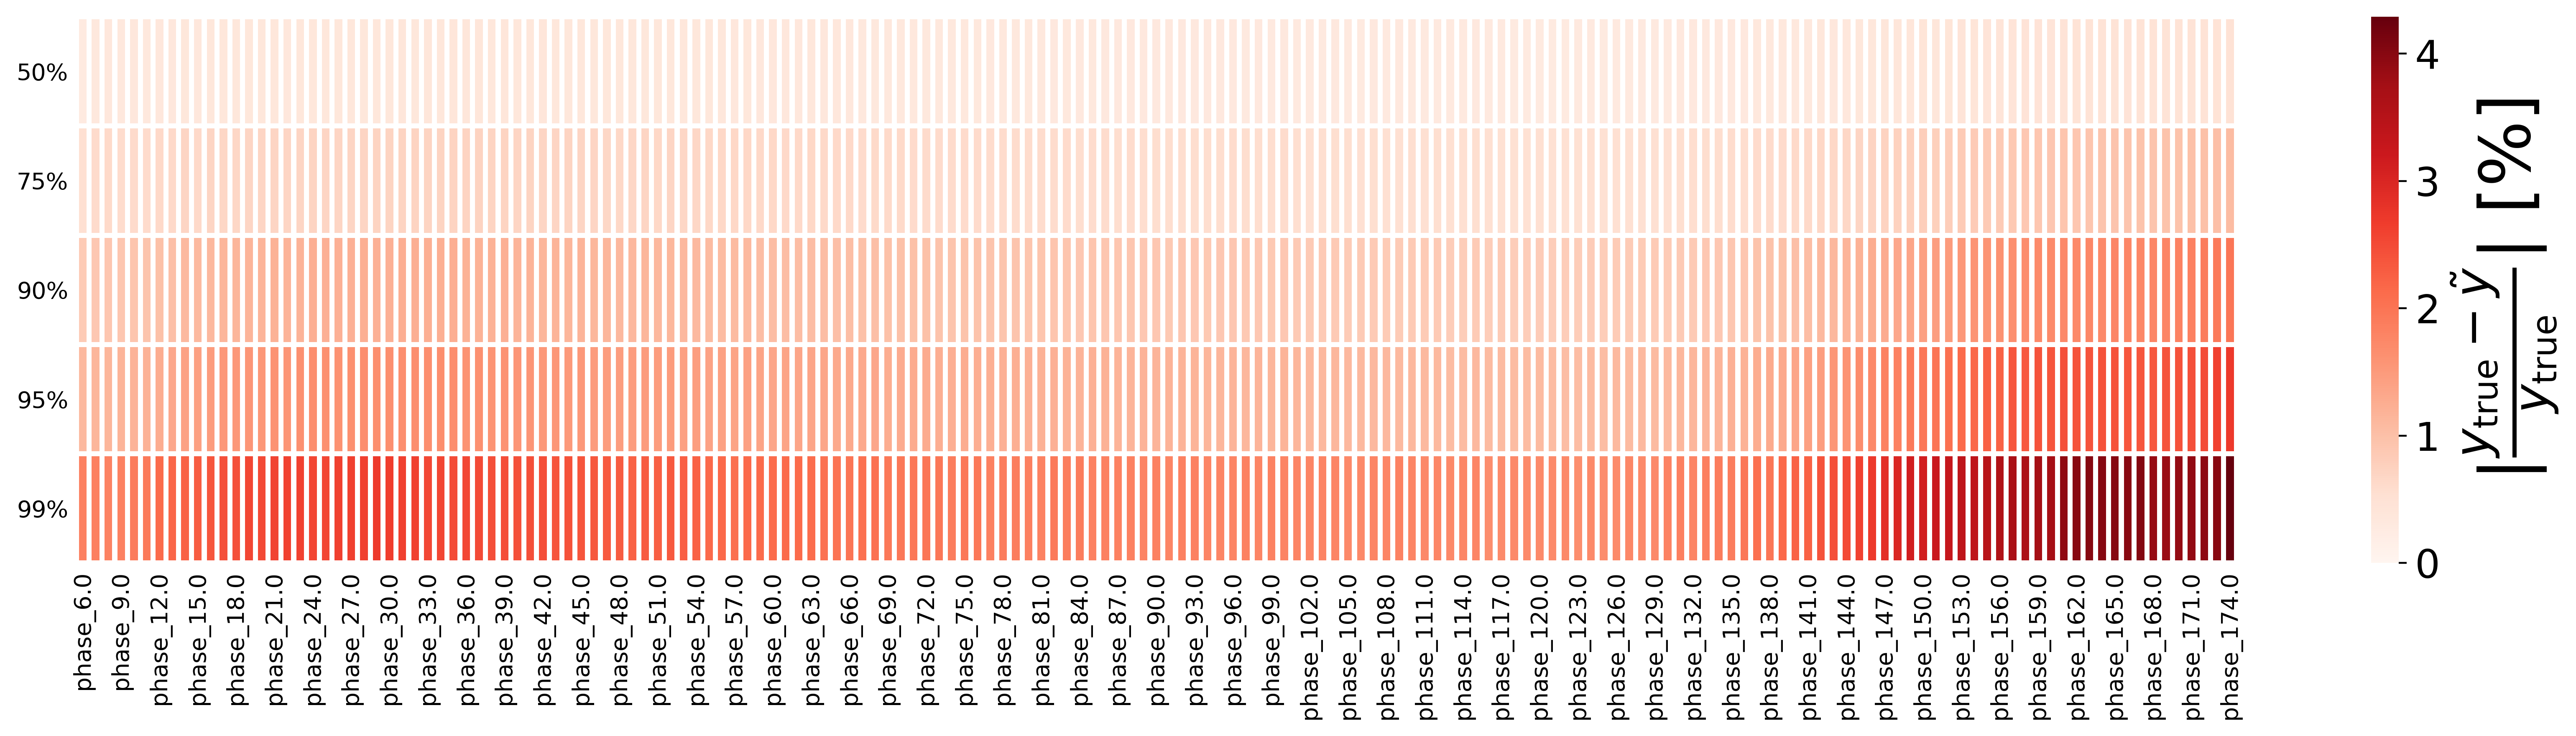

In [67]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
      #      annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_sampling_rel_error_percentiles.jpg')


In [68]:
rel_error_table_iv.max()

phase_6.0      1.84
phase_7.0      1.85
phase_8.0      1.82
phase_9.0      1.84
phase_10.0     1.90
               ... 
phase_170.0    3.89
phase_171.0    3.91
phase_172.0    3.95
phase_173.0    4.00
phase_174.0    4.29
Length: 169, dtype: float64

### DVARs vs. percentage errors

In [69]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi_test_plot.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error_iv[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/sampling_percentage_error_vs_{design_var}.jpg')
    
    return fig

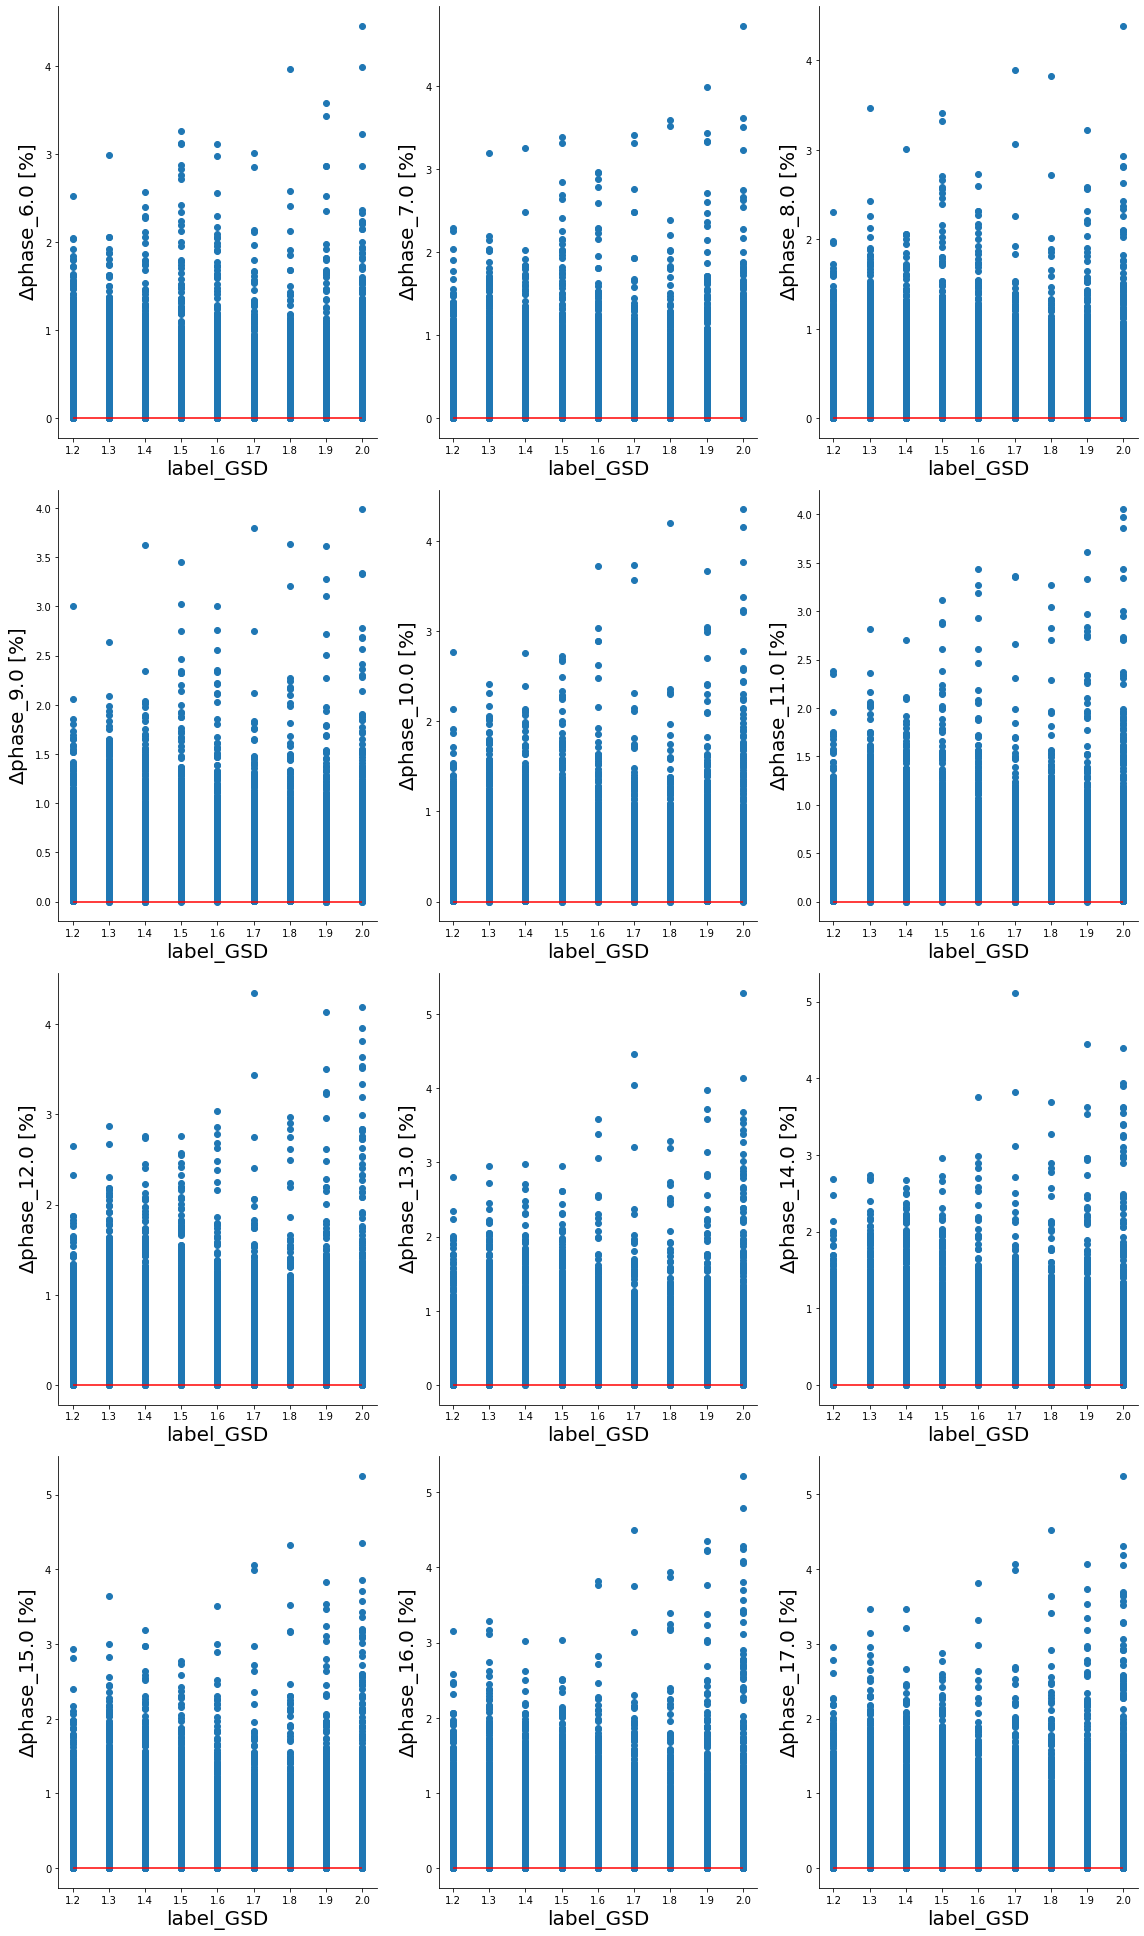

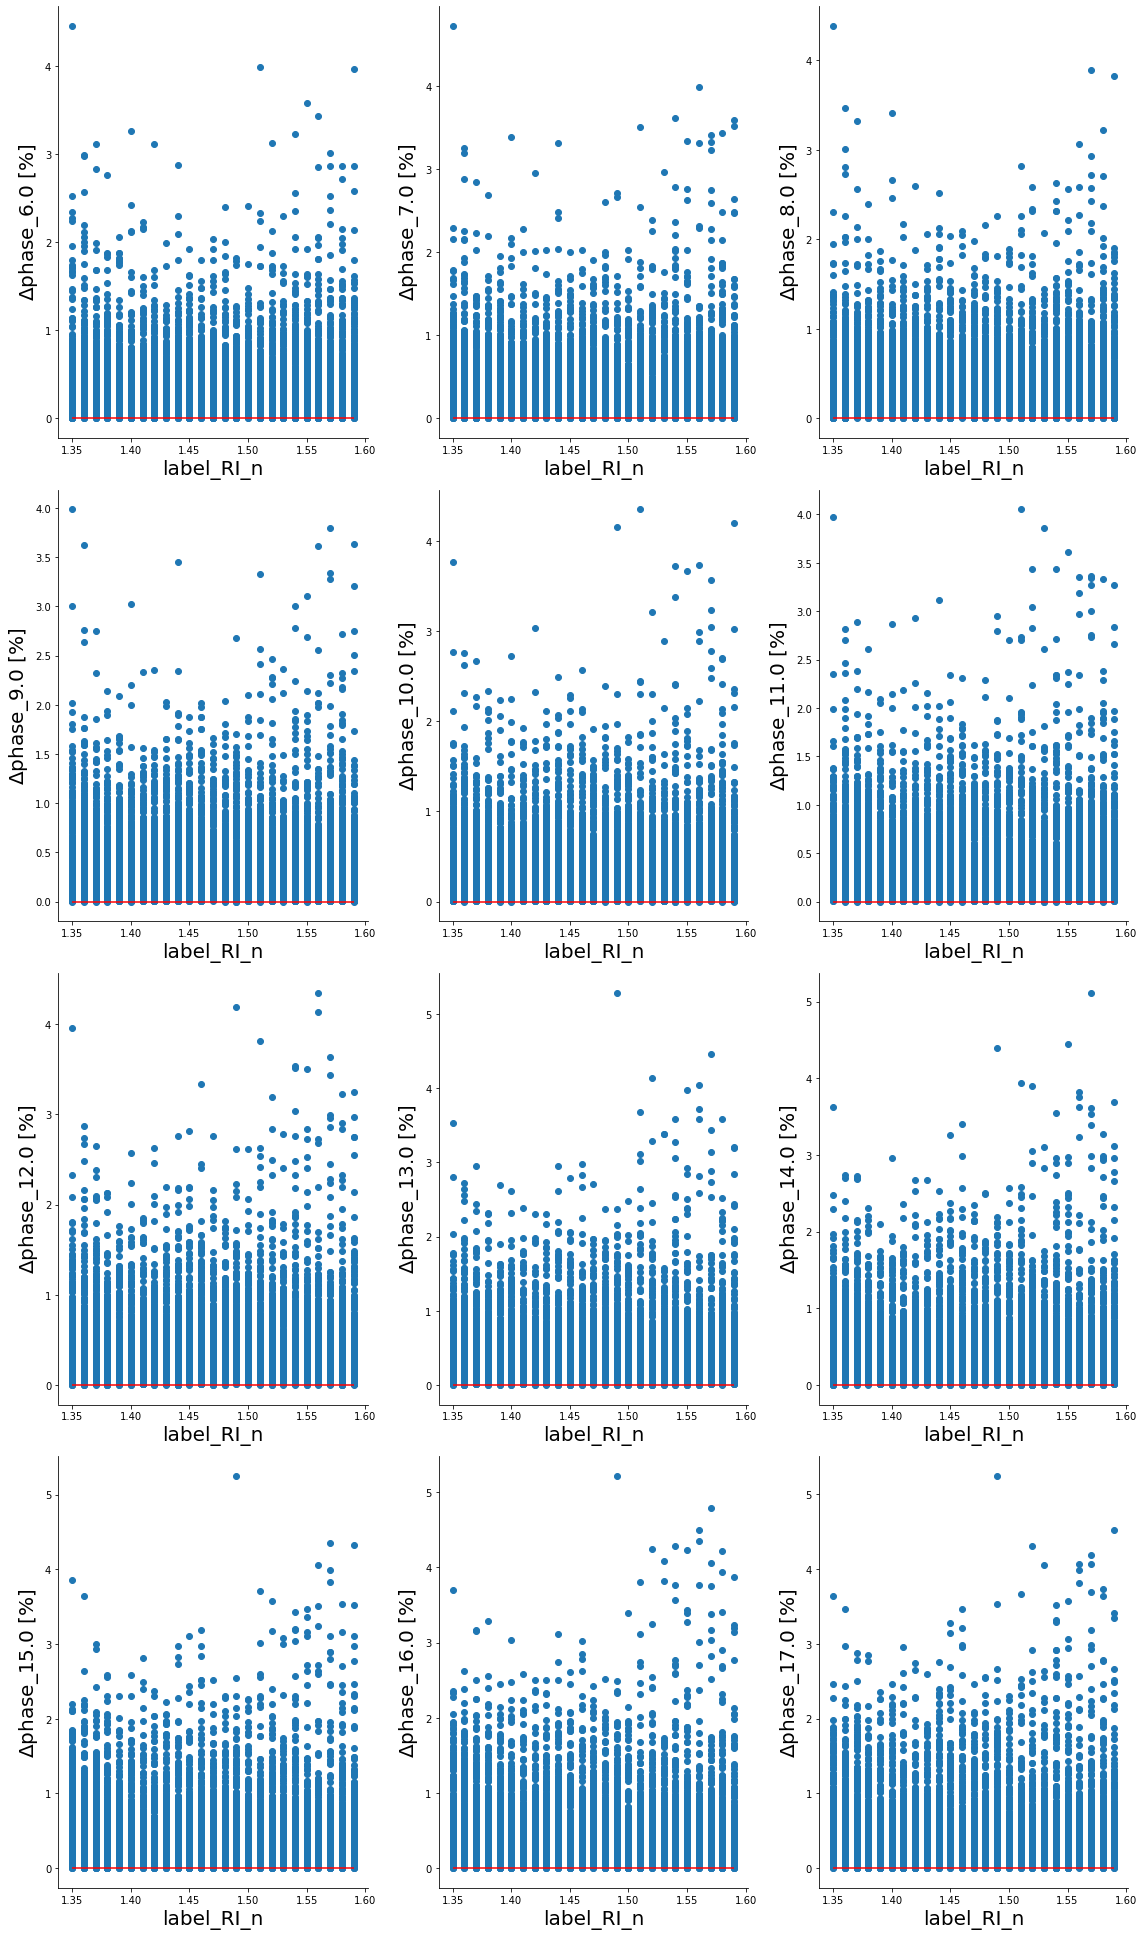

In [70]:
for d in dvar.columns:
    plot_error_vs_dvar(d)

### Correlations between DVARs and QOIs

In [71]:
combined_iv = pd.concat([dvar_test, rel_error_iv], axis=1)

In [72]:
corr_iv = np.round(combined_iv.corr(), decimals=2)

In [73]:
to_plot_iv = corr_iv.copy()
to_plot_iv.drop(columns=dvar.columns, inplace=True)
to_plot_iv.drop(index=qoi.columns, inplace=True)

In [74]:
to_plot_iv

phase_6.0  phase_7.0  phase_8.0  phase_9.0  phase_10.0  \
label_GMR        -0.21      -0.06      -0.07      -0.01        0.07   
label_GSD        -0.05      -0.02      -0.04      -0.03       -0.02   
label_RI_n        0.01       0.01       0.00      -0.01       -0.00   
label_RI_k        0.11       0.10       0.06       0.03       -0.01   

             phase_11.0  phase_12.0  phase_13.0  phase_14.0  phase_15.0  ...  \
label_GMR          0.08        0.14        0.16        0.19        0.18  ...   
label_GSD         -0.01       -0.01       -0.01       -0.01       -0.02  ...   
label_RI_n        -0.01        0.01        0.00        0.02       -0.02  ...   
label_RI_k        -0.05       -0.08       -0.09       -0.11       -0.12  ...   

             phase_165.0  phase_166.0  phase_167.0  phase_168.0  phase_169.0  \
label_GMR           0.29         0.29         0.28         0.29         0.28   
label_GSD          -0.01        -0.01        -0.00        -0.02        -0.02   
label_RI_n          0.09         0.09         0.09         0.09         0.08   
label_RI_k         -0.26        -0.27        -0.27        -0.26        -0.27   

             phase_170.0  phase_171.0  phase_172.0  phase_173.0  phase_174.0  
label_GMR           0.28         0.27         0.28         0.29         0.30  
label_GSD          -0.02        -0.02        -0.01        -0.02        -0.01  
label_RI_n          0.07         0.06         0.06         0.06         0.05  
label_RI_k         -0.28        -0.28        -0.29        -0.29        -0.29  

[4 rows x 169 columns]

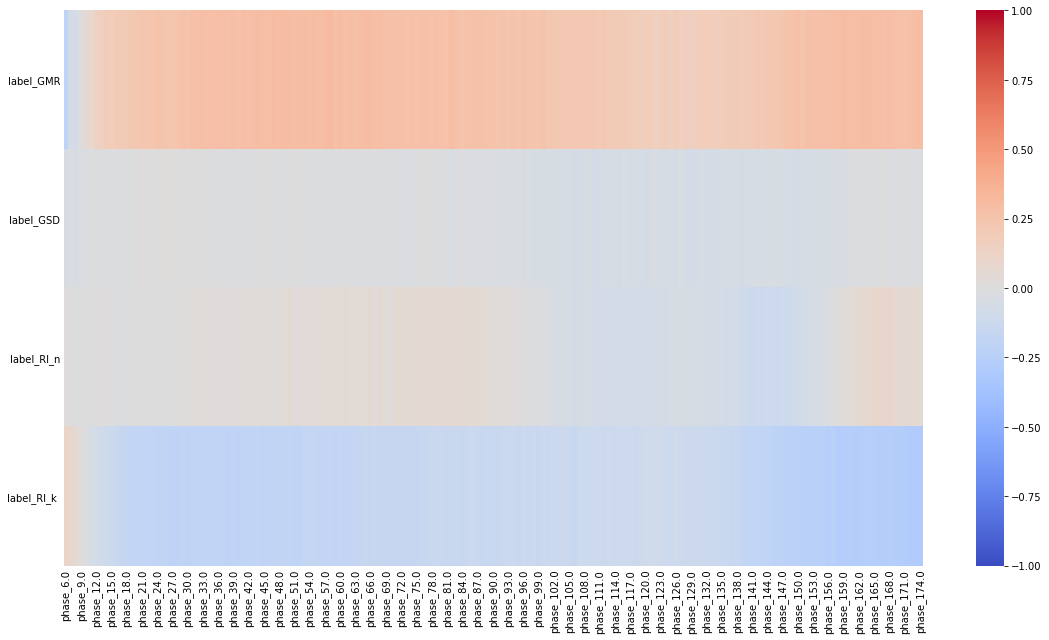

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot_iv,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
#            annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/sampling_rel_error_correlations.jpg')

### Residuals

KeyError: 'phase_4.0'

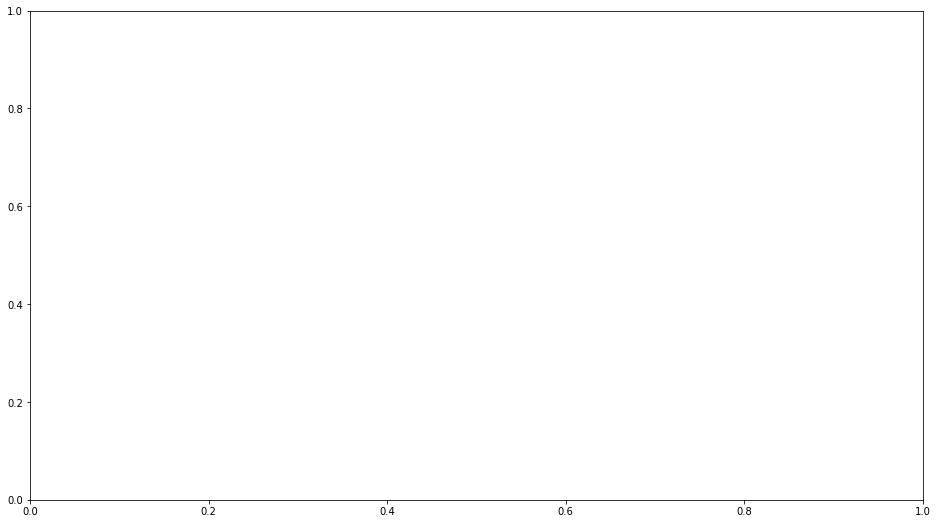

In [76]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in ['phase_4.0', 'phase_5.0', 'phase_6.0']:
    sns.distplot(error_iv[col], ax=ax)

ax.text(x=0.3,
        y=0.1,
        color=colors[0],
        s=r'$phase 4.0$',
        fontsize=30)
ax.text(x=0.3,
        y=1.,
        color=colors[1],
        s=r'$phase 5.0$',
        fontsize=30)
ax.text(x=0.3,
        y=2,
        color=colors[2],
        s=r'$phase 6.0$',
        fontsize=30)

ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

#fig.savefig(f'{plot_dir}/sampling_residual_distr_sigma.jpg')

In [ ]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in qoi.columns:
    sns.distplot(error_iv[col], ax=ax)



ax.set_xlabel('Residuals [mm mrad]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/forward_residual_distr_epsilon.jpg')

In [ ]:
def standardise(x):
    return (x - x.mean()) / x.std()

In [ ]:

fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error_iv[col]), dist="norm", plot=ax);
#    ax.set_title(qoi_labels[col], fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
fig.savefig(f'{plot_dir}/sampling_residual_normality_plots.jpg')

In [151]:
pd.DataFrame({'Mean': error_iv.mean(axis=0), 'std': error_iv.std(axis=0)})

Mean       std
phase_6.0   -0.003406  0.079991
phase_7.0   -0.004415  0.084920
phase_8.0   -0.018112  0.084724
phase_9.0   -0.013864  0.085086
phase_10.0  -0.020121  0.086652
...               ...       ...
phase_170.0 -0.009744  0.184331
phase_171.0 -0.005672  0.186313
phase_172.0  0.000545  0.189658
phase_173.0 -0.014922  0.193462
phase_174.0 -0.007253  0.200035

[169 rows x 2 columns]

In [152]:
rel_error_iv.abs().quantile(0.9)

phase_6.0      0.842606
phase_7.0      0.916573
phase_8.0      0.921577
phase_9.0      0.915850
phase_10.0     0.930261
                 ...   
phase_170.0    1.803534
phase_171.0    1.838767
phase_172.0    1.889996
phase_173.0    1.933923
phase_174.0    1.987826
Name: 0.9, Length: 169, dtype: float64

In [153]:
statistic_iv, p_iv = scipy.stats.shapiro(standardise(error_iv['phase_5.0']).values)

KeyError: 'phase_5.0'

In [154]:
p_iv

NameError: name 'p_iv' is not defined

In [155]:
statistic_iv

NameError: name 'statistic_iv' is not defined

In [156]:
surr.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 182)]             0         
_________________________________________________________________
affine_coupling_block (Affin (None, 182)               29764     
_________________________________________________________________
permutation_layer (Permutati (None, 182)               0         
_________________________________________________________________
affine_coupling_block_1 (Aff (None, 182)               29764     
_________________________________________________________________
permutation_layer_1 (Permuta (None, 182)               0         
_________________________________________________________________
affine_coupling_block_2 (Aff (None, 182)               29764     
_________________________________________________________________
permutation_layer_2 (Permuta (None, 182)              

In [157]:
from keras.utils.vis_utils import plot_model

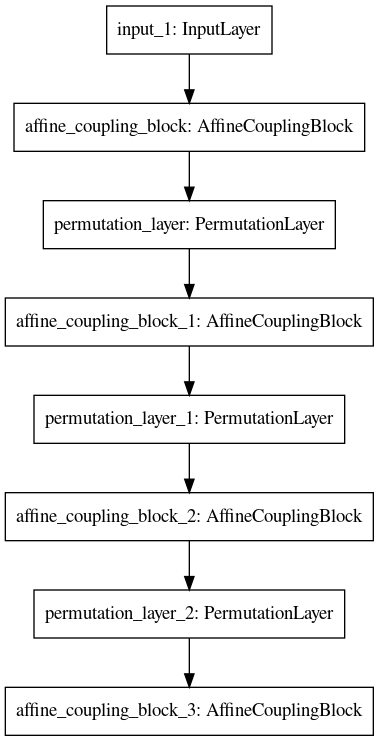

In [158]:
plot_model(surr.model, show_shapes=False,show_layer_names=True,to_file = f'{plot_dir}/model_architecture_invertible.png')


In [ ]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
#presentation_plot_index = [70,18,30,46,59,65]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test.columns)),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_iv.columns)),qoi_pred_iv.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

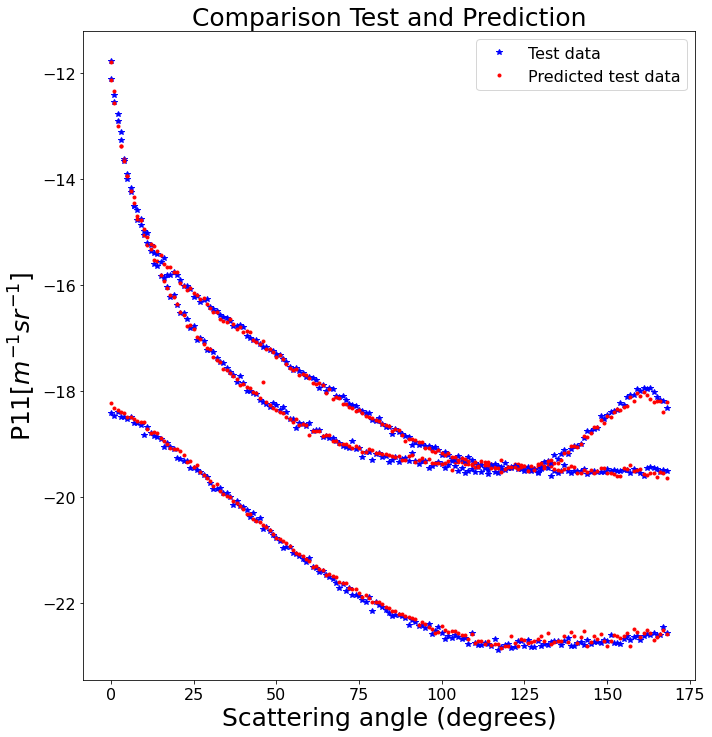

In [164]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test.columns)),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_fw.columns)),qoi_pred_fw.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_fw.jpg')

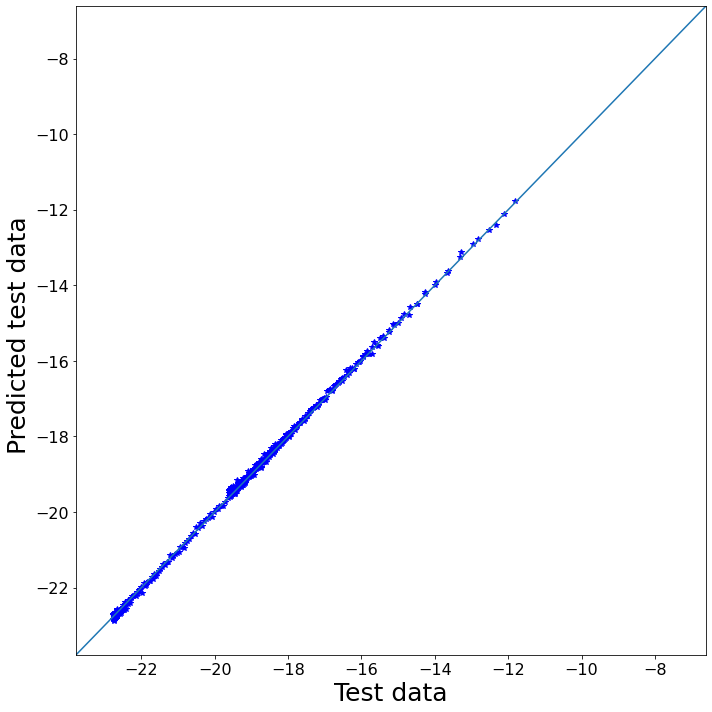

In [166]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    
    ax.plot(qoi_pred_iv.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([-23, -23], [-7.4, -7.4])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_iv.jpg')

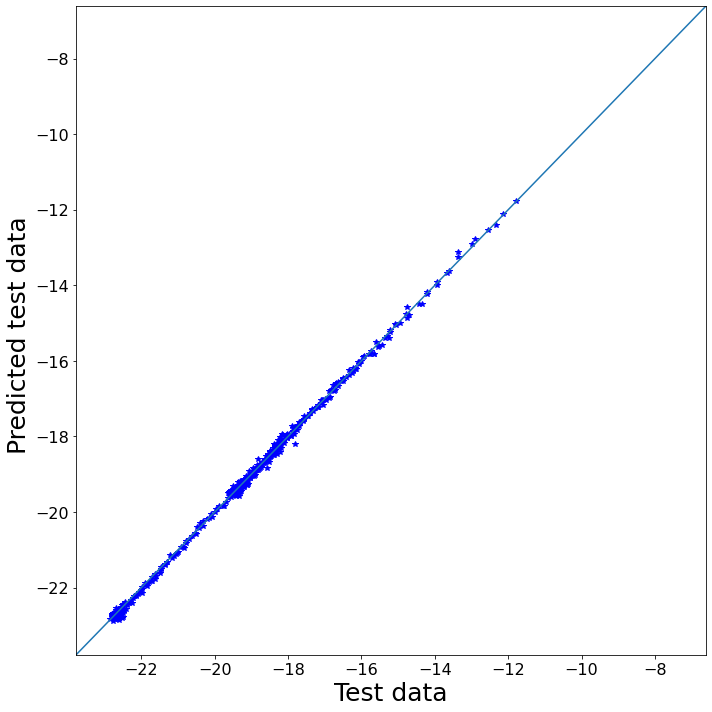

In [167]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([-23, -23], [-7.4, -7.4])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_fw.jpg')

In [ ]:
r2_adj_fw = r2_adj_fw.rename({0: 'r2_adj'}, axis='index')
r2_adj_iv = r2_adj_iv.rename({0: 'r2_adj'}, axis='index')


# create overview plot

In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot_fw,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_fw.jpg')



In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot_iv,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_iv.columns)+3),qoi_pred_iv.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_iv.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_iv.jpg')

